# 付録1

In [1]:
import glob
import itertools
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.8, style = 'darkgrid')
palette4 = sns.color_palette(["#C7243A", "#EDAD0B", "#23AC0E", "#3261AB"], 4)
palette6 = sns.color_palette(["#C7243A", "#EDAD0B", "#A4C520", "#23AC0E", "#3261AB", "#744199"], 6)
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

In [2]:
COLUMNS = {
    'network_type': str,
    'hop_game': int,
    'hop_learning': int,
    'b': float,
    'μ': float,
    'δ': float,
    'interaction_rule': str,
    'update_rule': str,
    'trial': int,
    'cooperator_rate': float
}
GROUPBY_COLUMNS = [c for c in COLUMNS if c not in ['trial', 'cooperator_rate']]

def load_df(csv_file_name: str) -> pd.DataFrame:
    _df = pd.read_csv(csv_file_name, header=None, names=COLUMNS.keys(), dtype=COLUMNS)
    return _df.groupby(GROUPBY_COLUMNS).agg({'cooperator_rate': np.mean}).reset_index()

# Group Interaction

In [3]:
%%time
dir_names = ['clean_data']
file_list = list(itertools.chain.from_iterable([glob.glob('../data/{}/*.csv'.format(dir_name)) for dir_name in dir_names]))
df_list = [load_df(file) for file in file_list]
df_raw = pd.concat(df_list).reset_index(drop=True)
df = df_raw.groupby(GROUPBY_COLUMNS).agg({'cooperator_rate': [len, np.mean, np.std]}).reset_index()
df.columns = GROUPBY_COLUMNS + ['trial', 'cooperator_rate', 'std']
df = df[
    (df.interaction_rule == 'Group') &
    (df.hop_game <= 6) &
    (df.hop_learning <= 6) &
    (df.b.isin([3.0, 4.0, 5.0, 6.0]))
]
df

CPU times: user 620 ms, sys: 64.3 ms, total: 684 ms
Wall time: 687 ms


network_type  hop_game  hop_learning    b     μ       δ  \
120        random_4         1             1  3.0  0.00  0.0625   
121        random_4         1             1  3.0  0.00  0.0625   
122        random_4         1             1  3.0  0.00  0.0625   
126        random_4         1             1  3.0  0.00  0.2500   
127        random_4         1             1  3.0  0.00  0.2500   
...             ...       ...           ...  ...   ...     ...   
28981  scale_free_4         6             6  6.0  0.01  0.2500   
28982  scale_free_4         6             6  6.0  0.01  0.2500   
28986  scale_free_4         6             6  6.0  0.01  1.0000   
28987  scale_free_4         6             6  6.0  0.01  1.0000   
28988  scale_free_4         6             6  6.0  0.01  1.0000   

      interaction_rule update_rule  trial  cooperator_rate  std  
120              Group          BD      1          0.00000  NaN  
121              Group          DB      1          0.00000  NaN  
122              Group          IM      1          0.00031  NaN  
126              Group          BD      1          0.00000  NaN  
127              Group          DB      1          0.00000  NaN  
...                ...         ...    ...              ...  ...  
28981            Group          DB      1          0.00000  NaN  
28982            Group          IM      1          0.00000  NaN  
28986            Group          BD      1          0.00000  NaN  
28987            Group          DB      1          0.00000  NaN  
28988            Group          IM      1          0.00000  NaN  

[7776 rows x 11 columns]


random_4, Group, BD


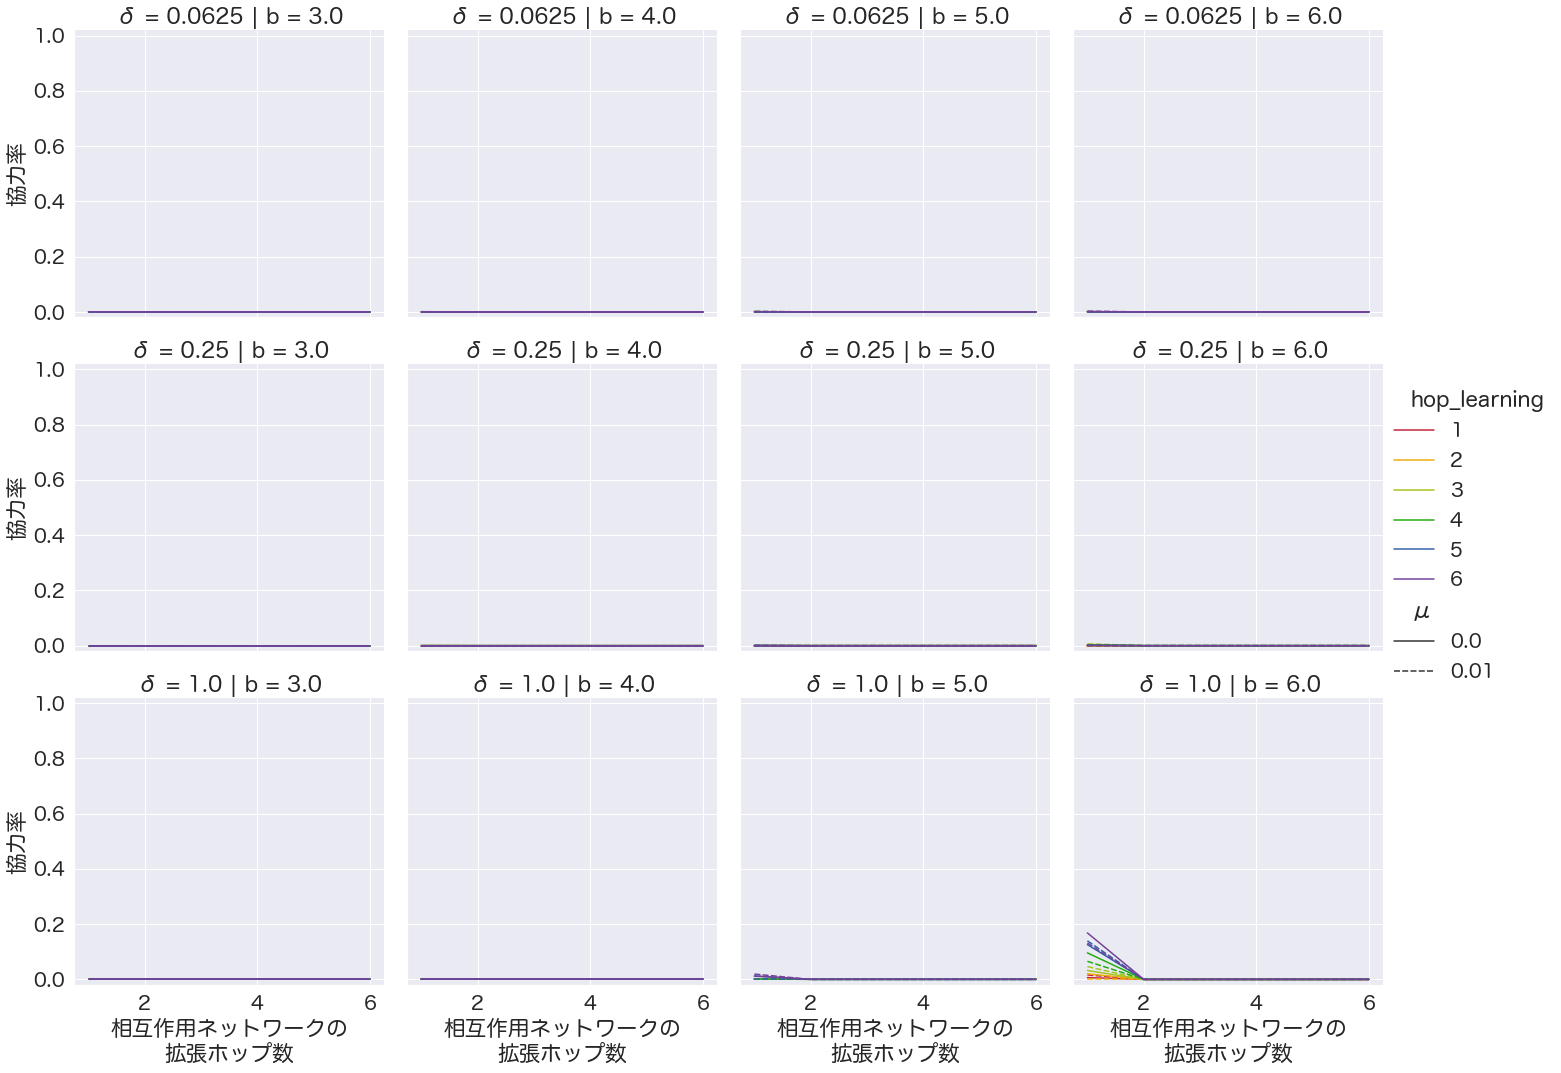


random_4, Group, DB


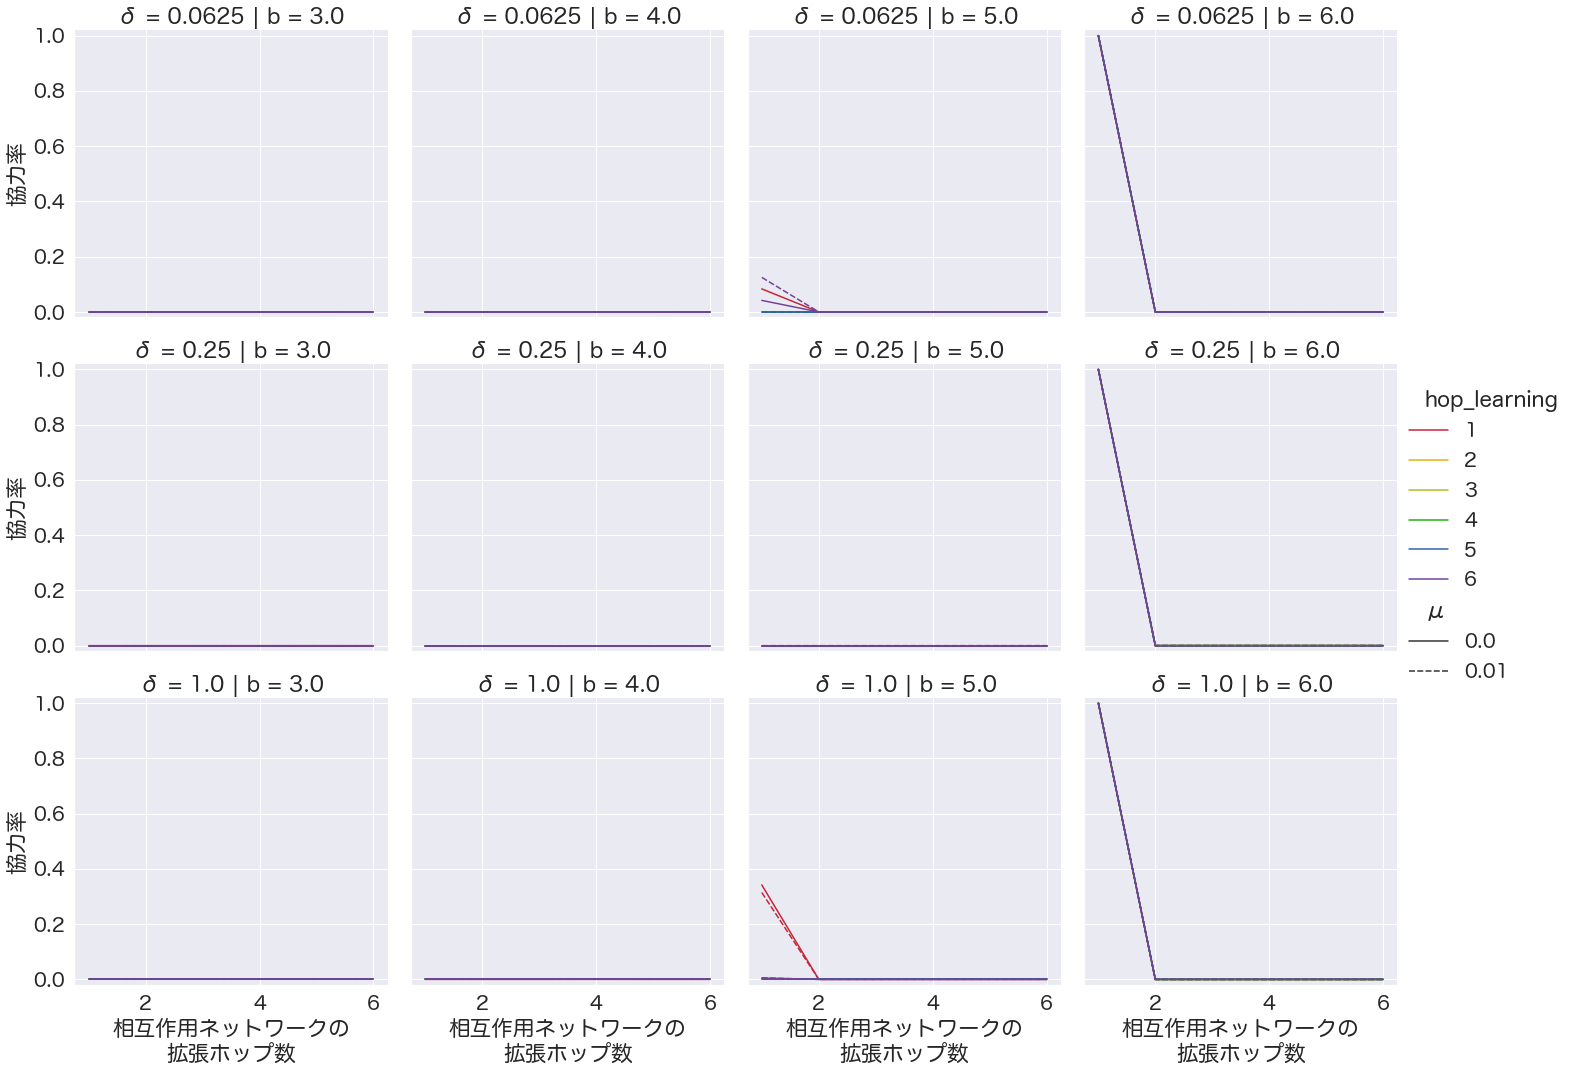


random_4, Group, IM


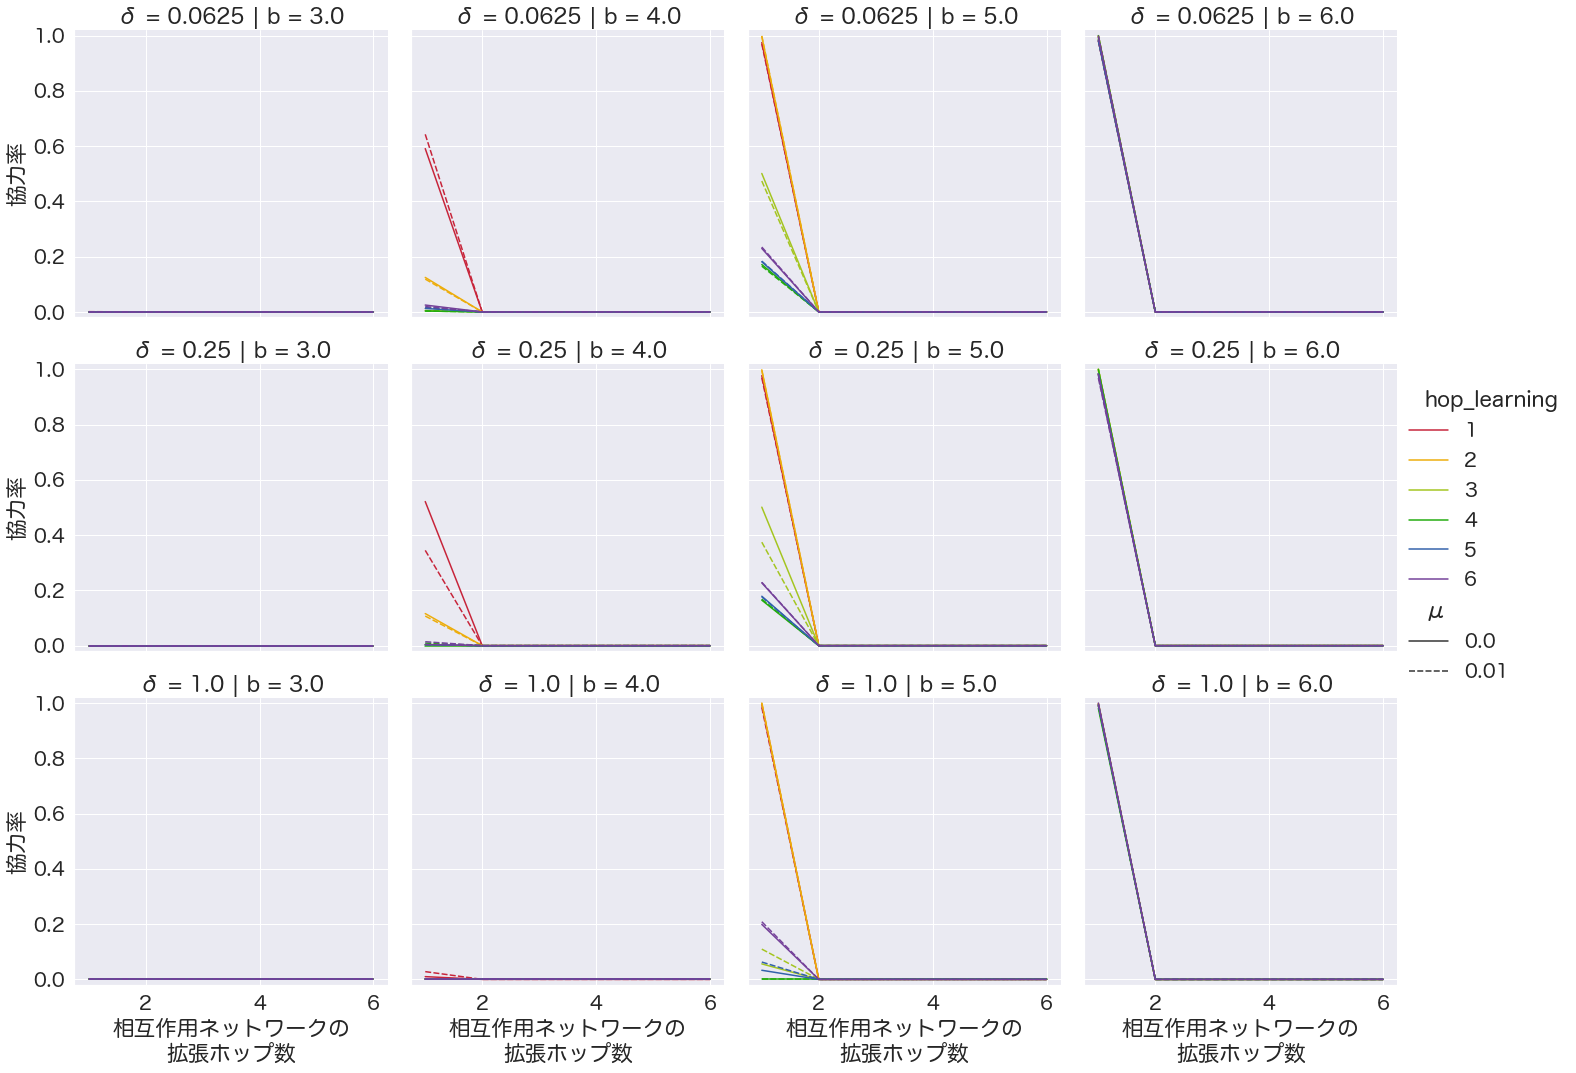


regular_4, Group, BD


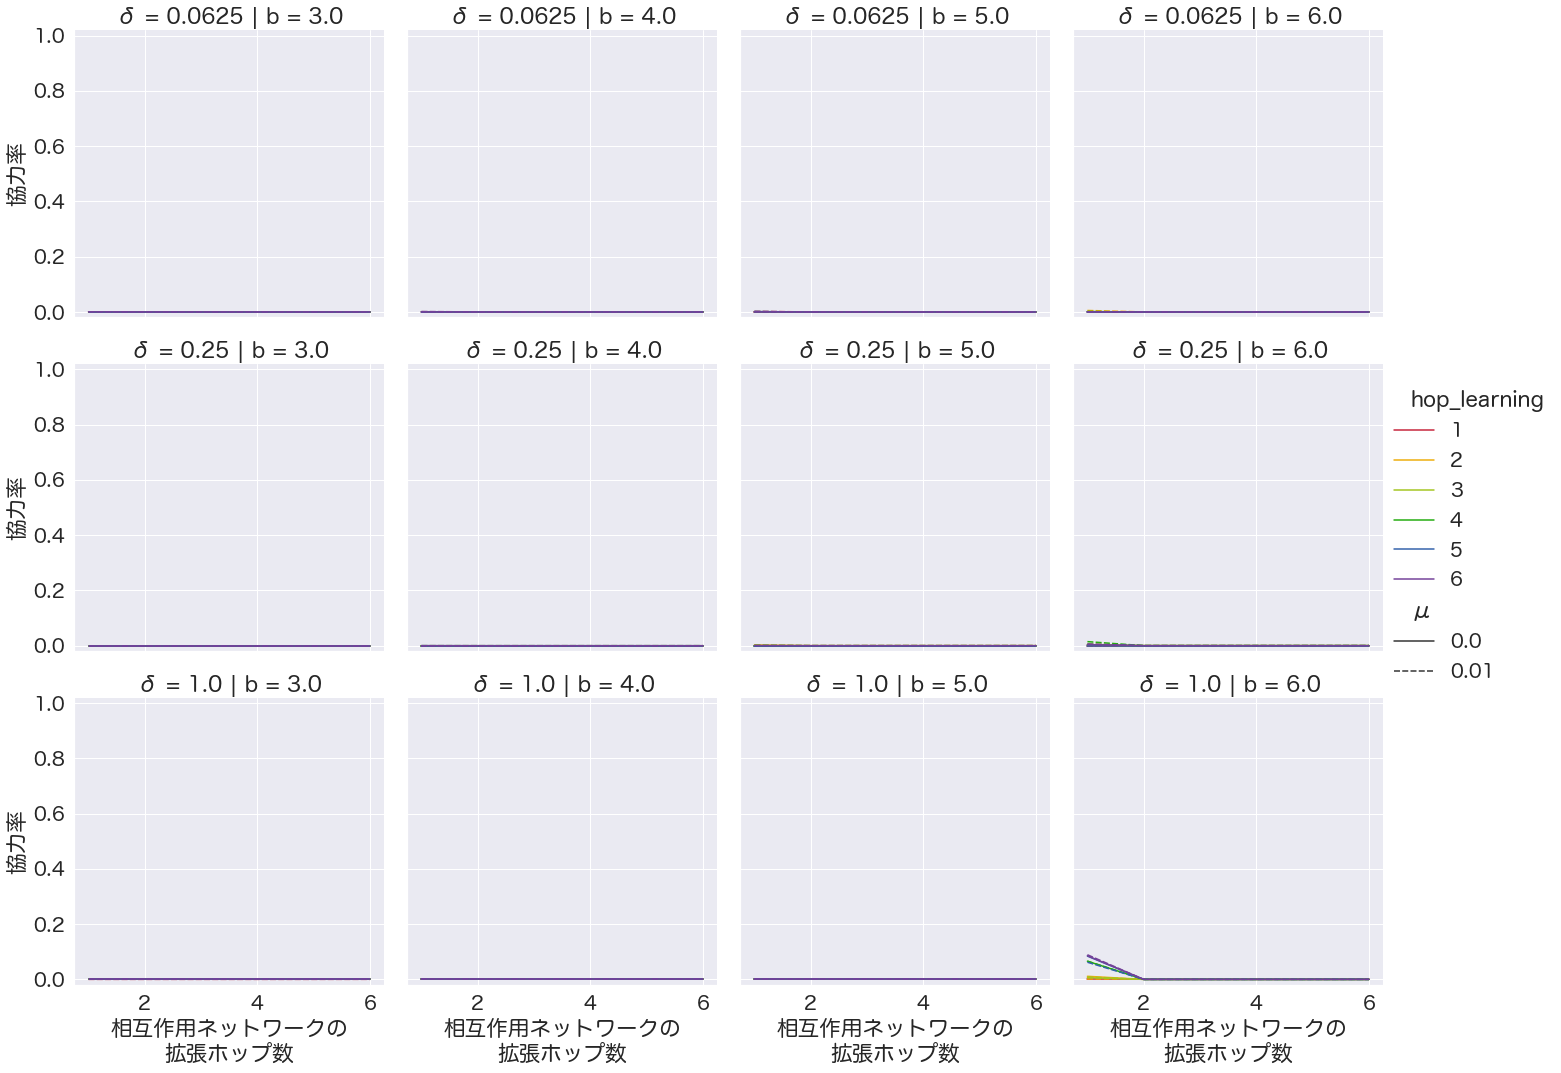


regular_4, Group, DB


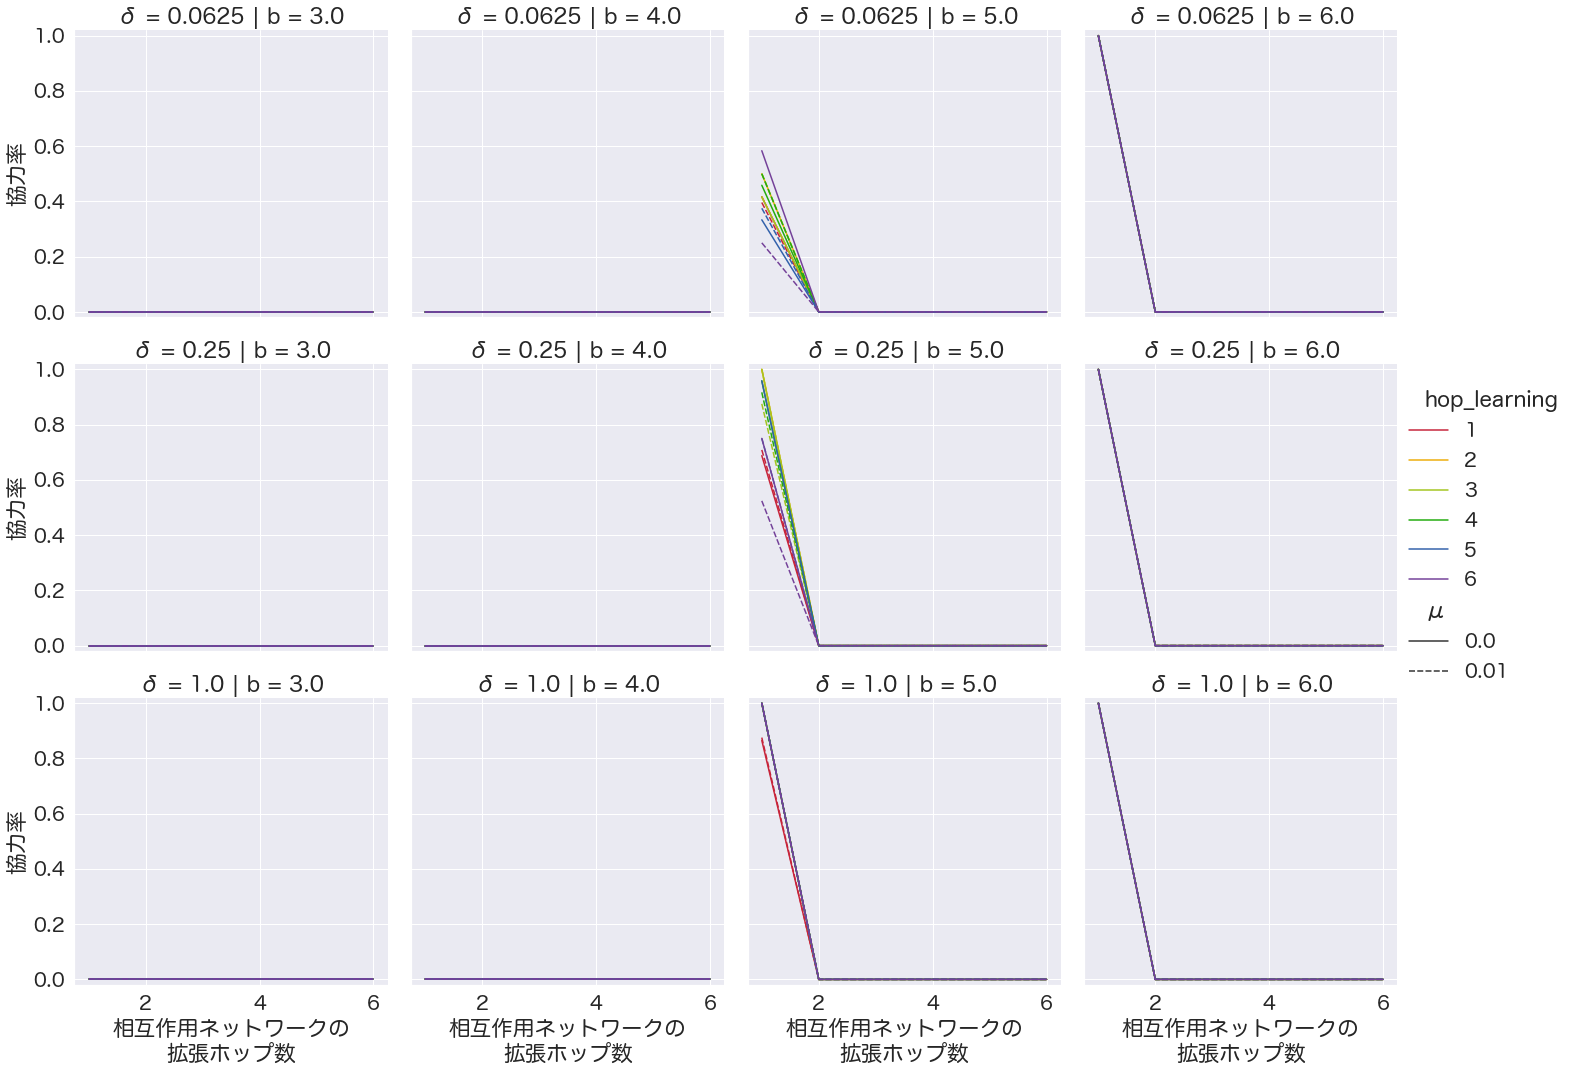


regular_4, Group, IM


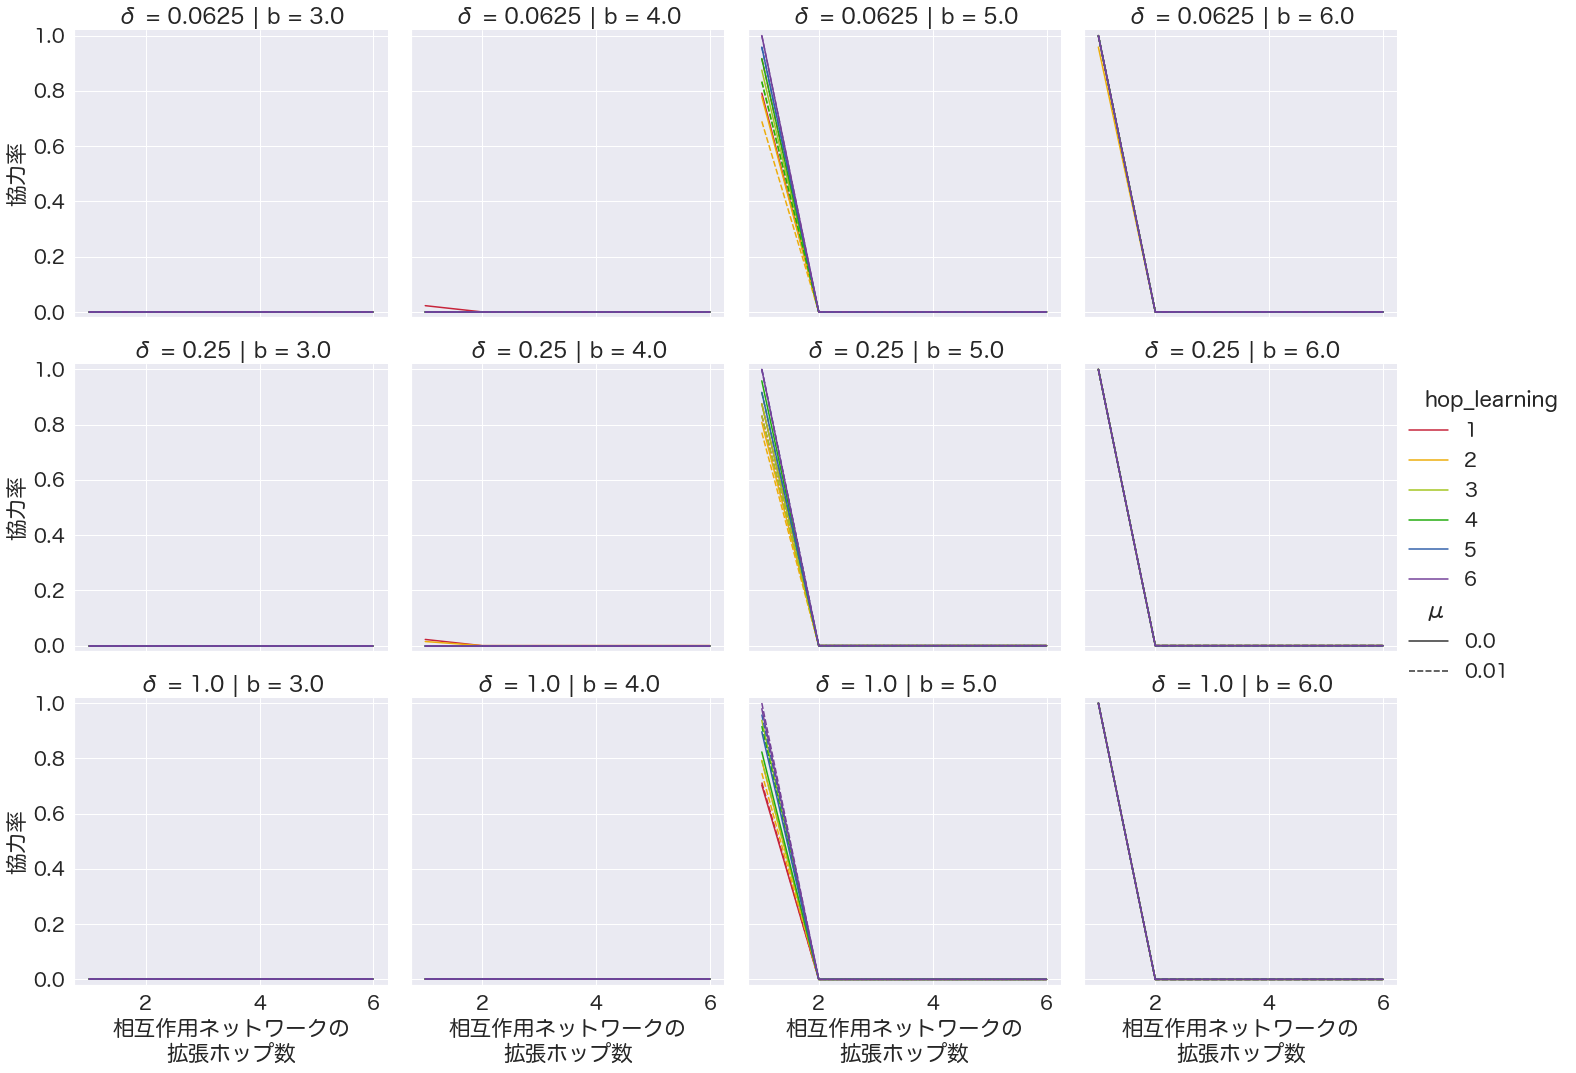


scale_free_4, Group, BD


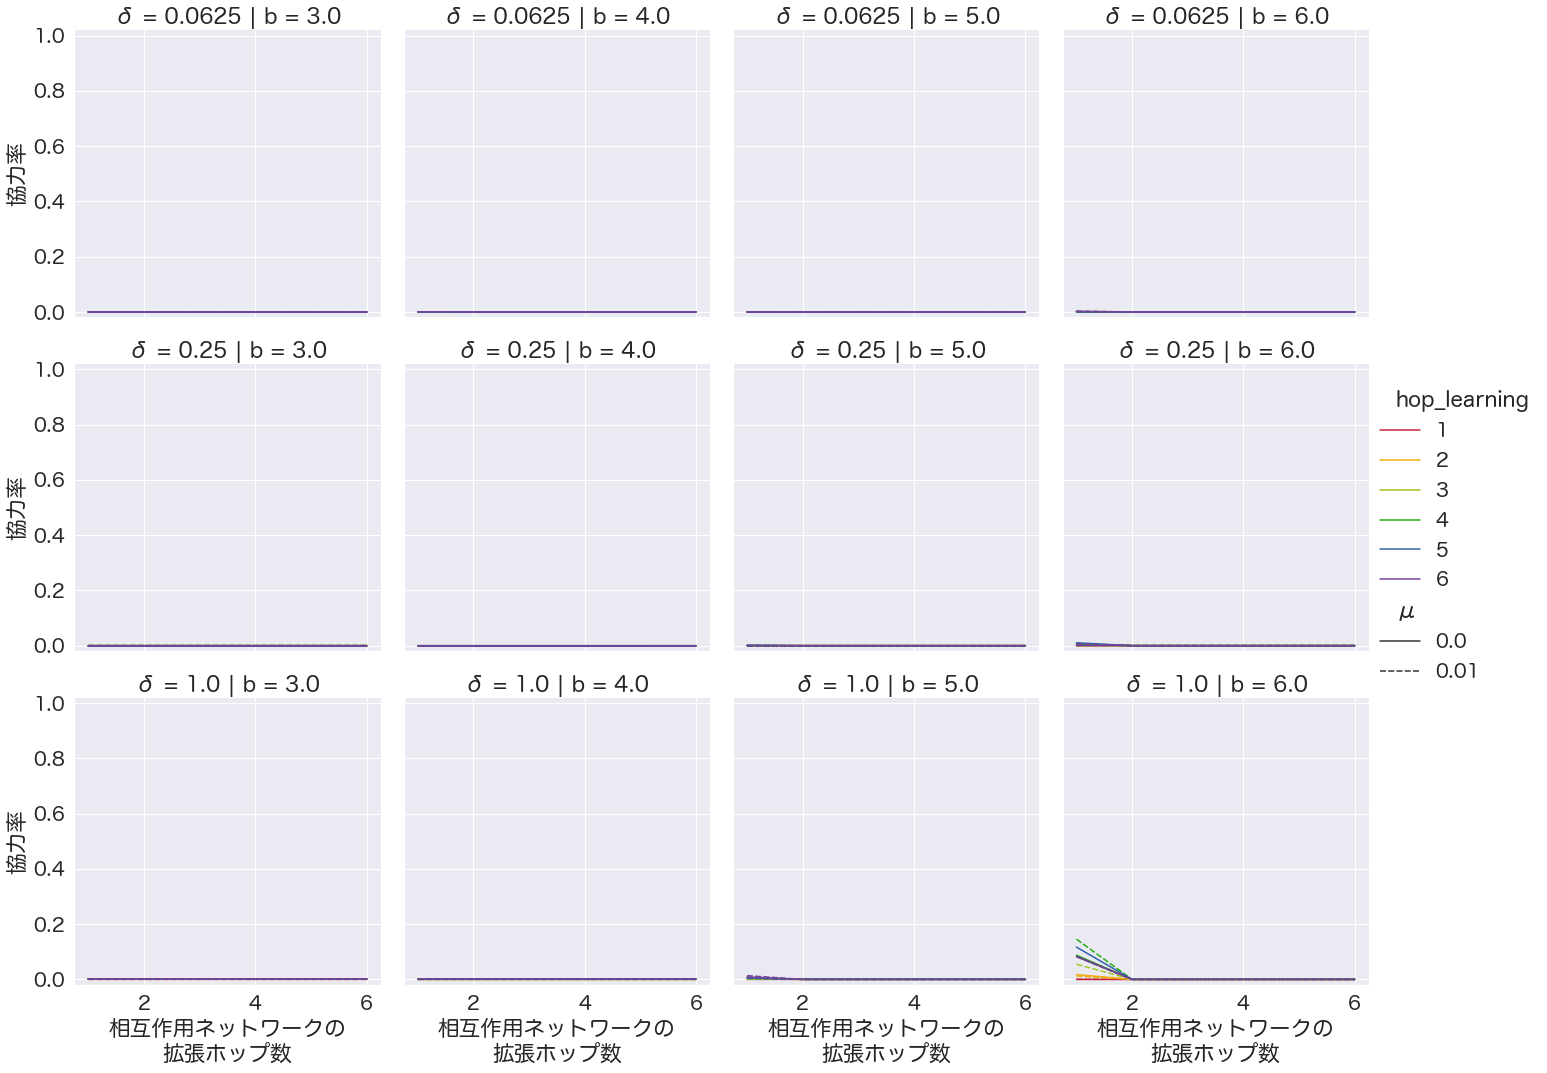


scale_free_4, Group, DB


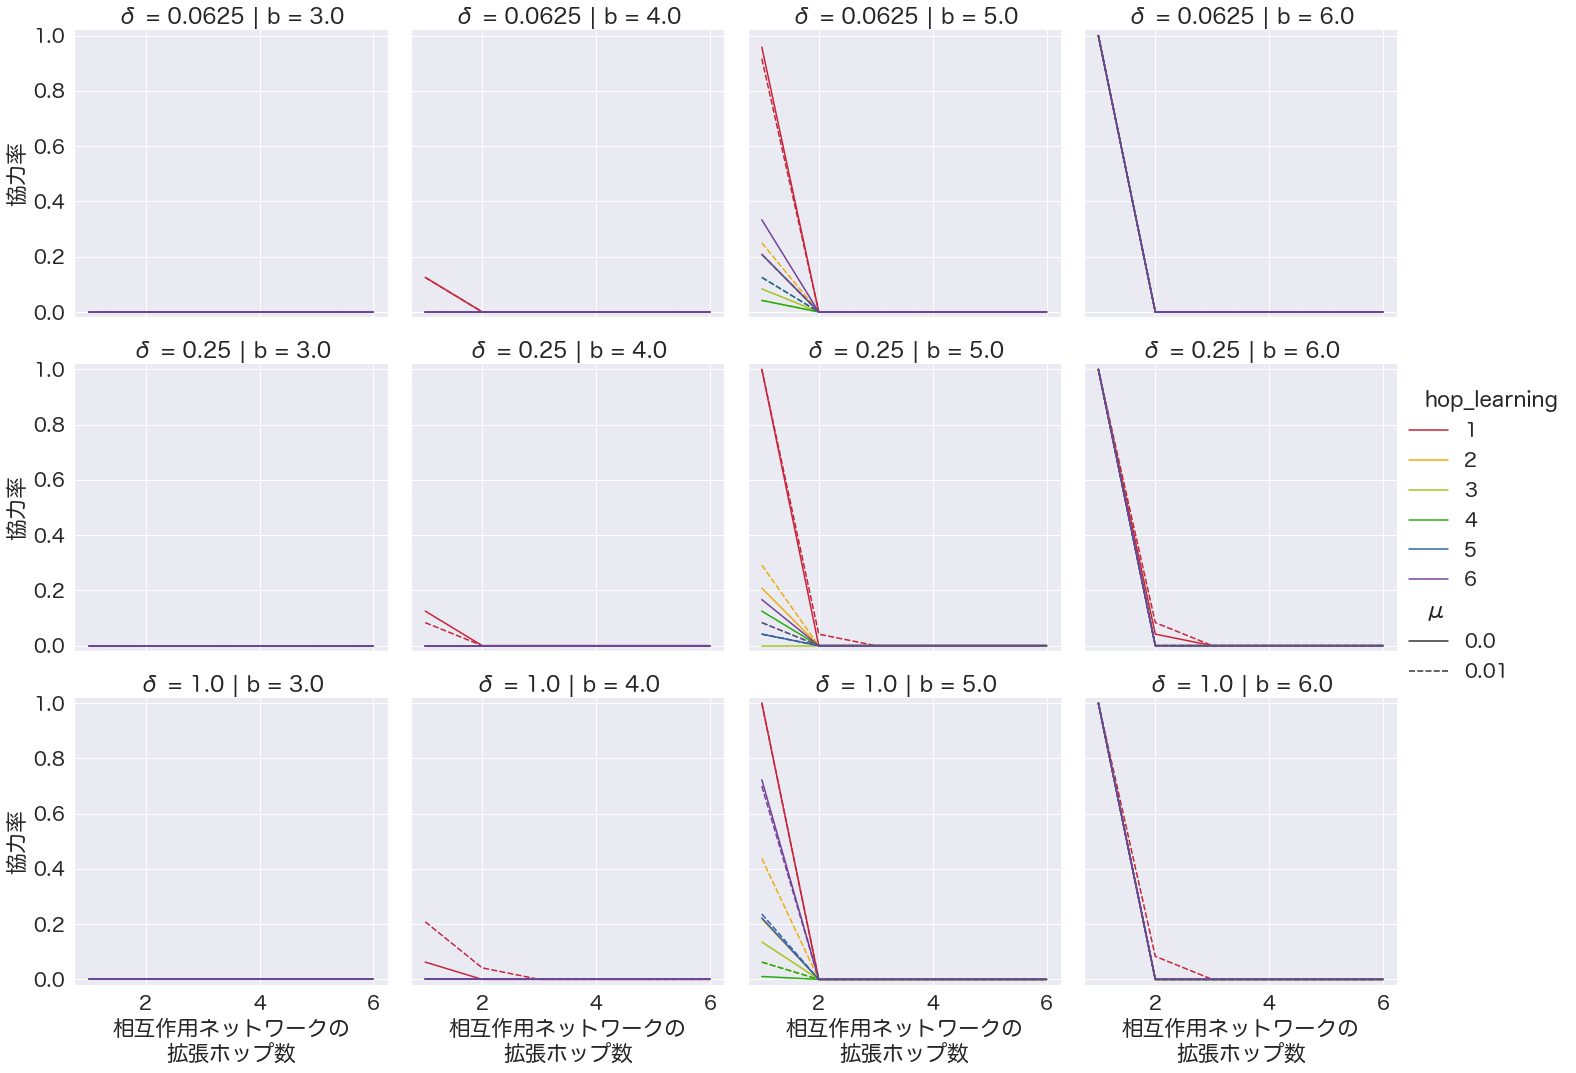


scale_free_4, Group, IM


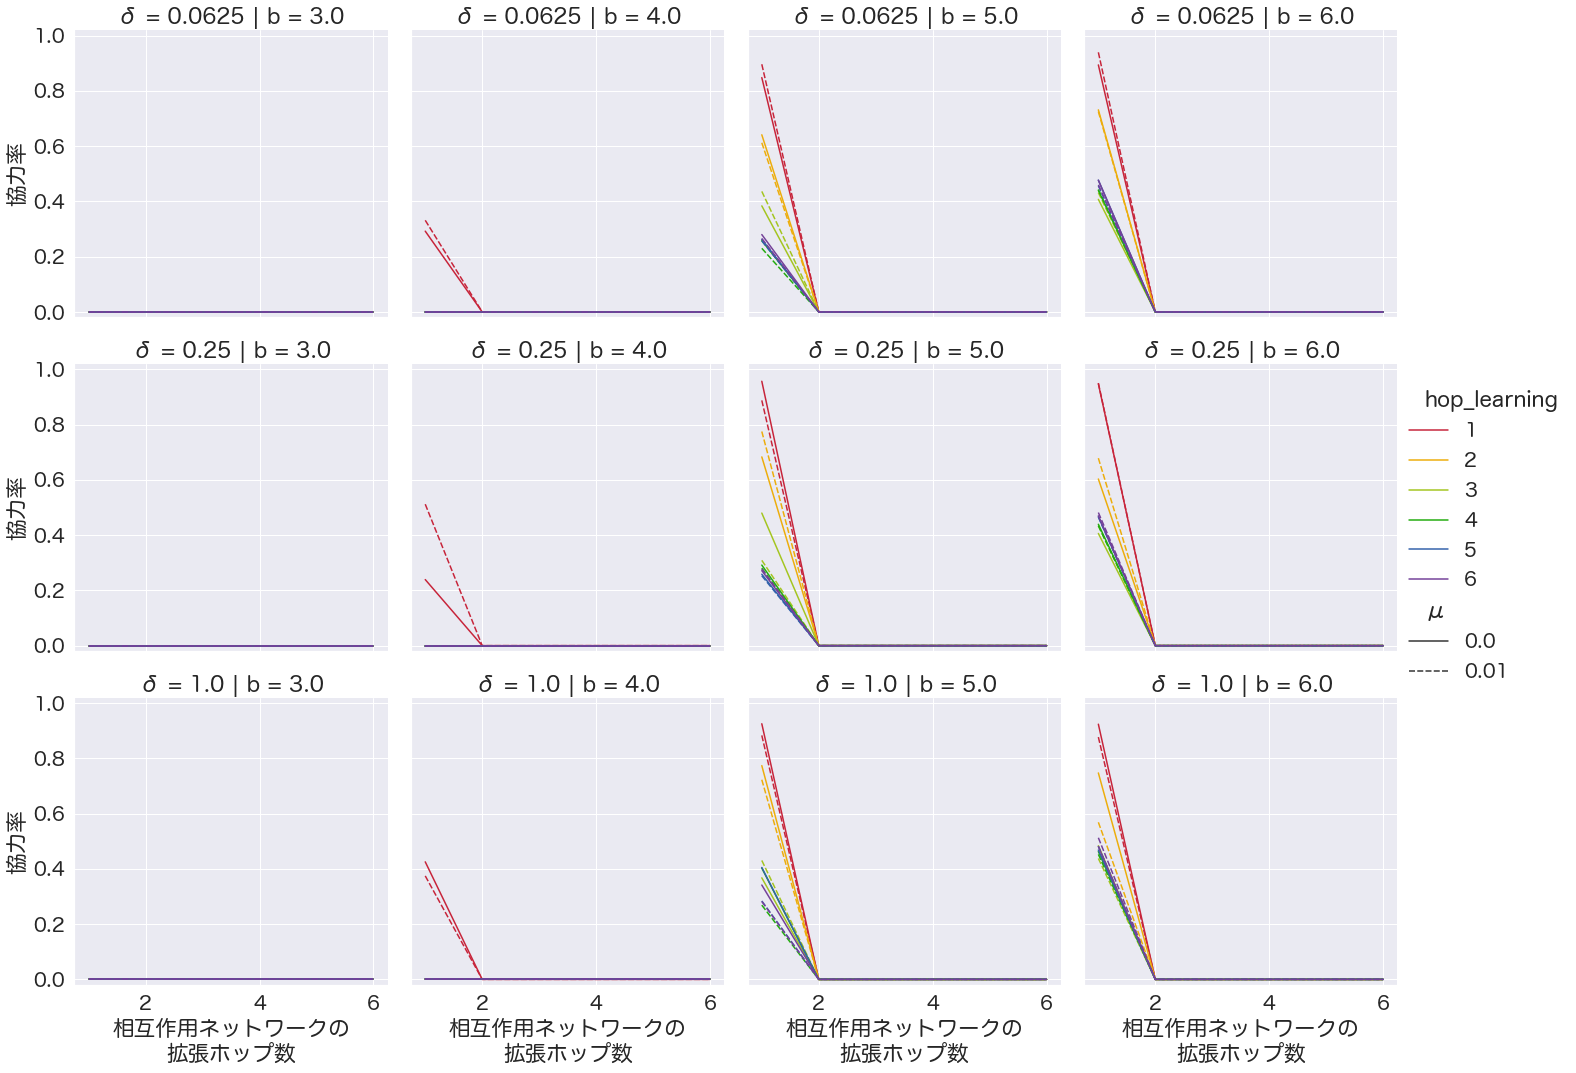

In [4]:
for (_, network_type, interaction_rule, update_rule) in df[['network_type', 'interaction_rule', 'update_rule']].drop_duplicates().itertuples():
    print('\n{}, {}, {}'.format(network_type, interaction_rule, update_rule))
    _df = df[(df.network_type == network_type) & (df.interaction_rule == interaction_rule) & (df.update_rule == update_rule)][[
        'hop_game', 'hop_learning', 'b', 'δ', 'μ', 'cooperator_rate'
    ]].reset_index(drop=True)
    g = sns.relplot(kind='line', x='hop_game', y='cooperator_rate', hue='hop_learning', row='δ', col='b', style='μ', palette=palette6, data=_df)
    g.set_axis_labels('相互作用ネットワークの\n拡張ホップ数', '協力率')
    g.set(ylim=(-0.02, 1.02))
    plt.show()

相互作用グラフを拡張すると協力が進化しないことが確認されたので、相互作用グラフの拡張ホップ数を1に固定して、戦略更新グラフを拡張するとどうなるかを見る。


random_4, Group, BD


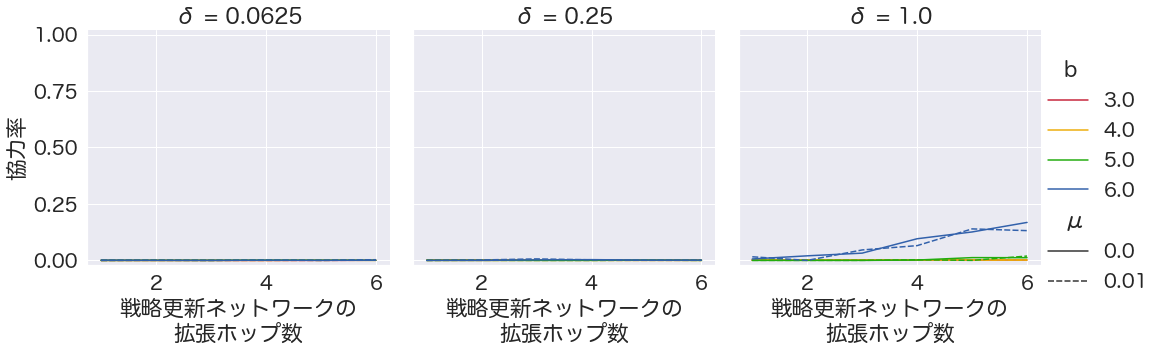


random_4, Group, DB


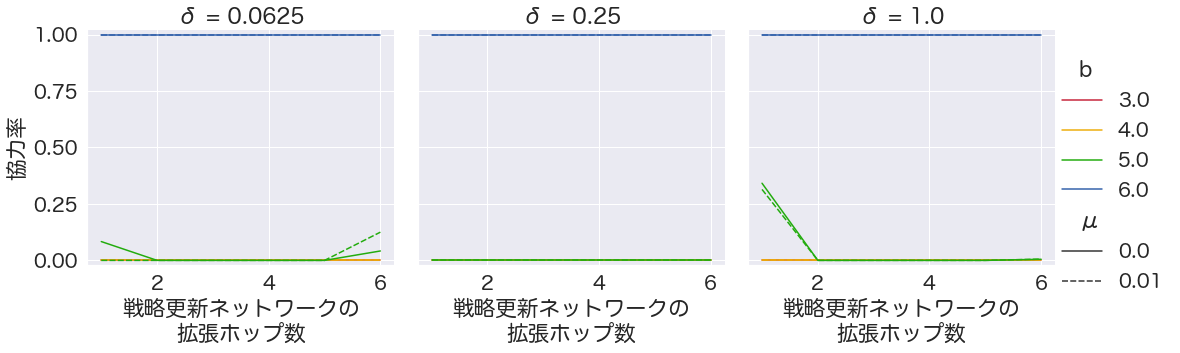


random_4, Group, IM


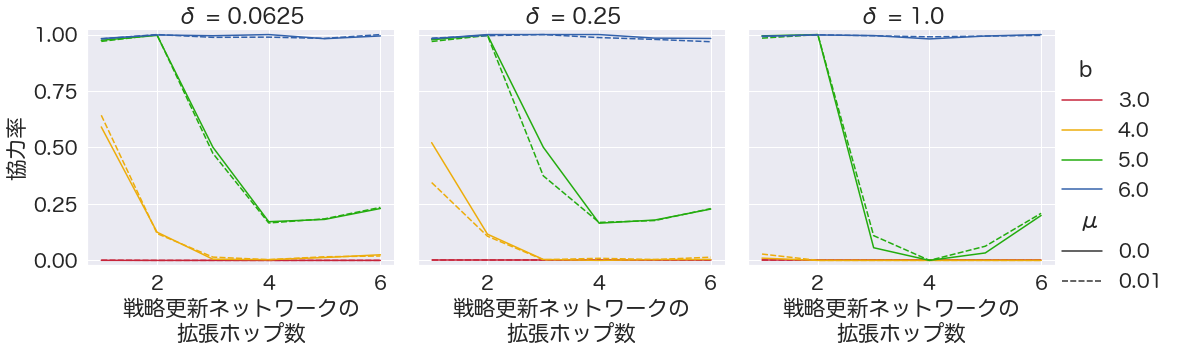


regular_4, Group, BD


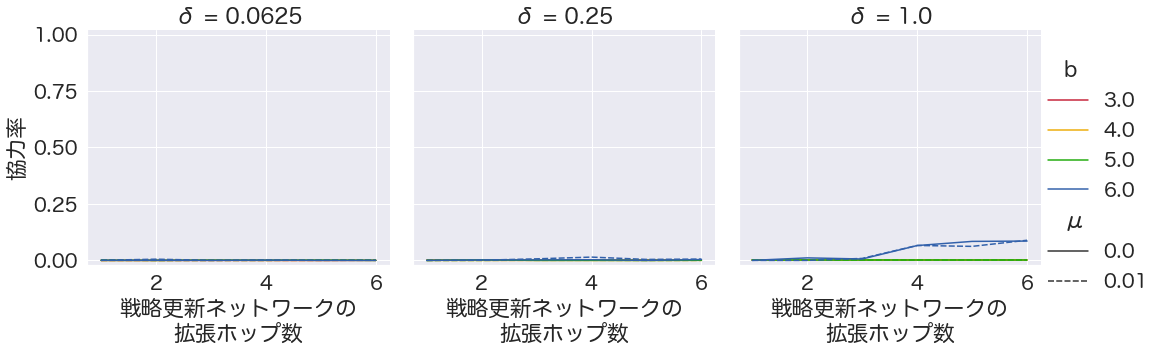


regular_4, Group, DB


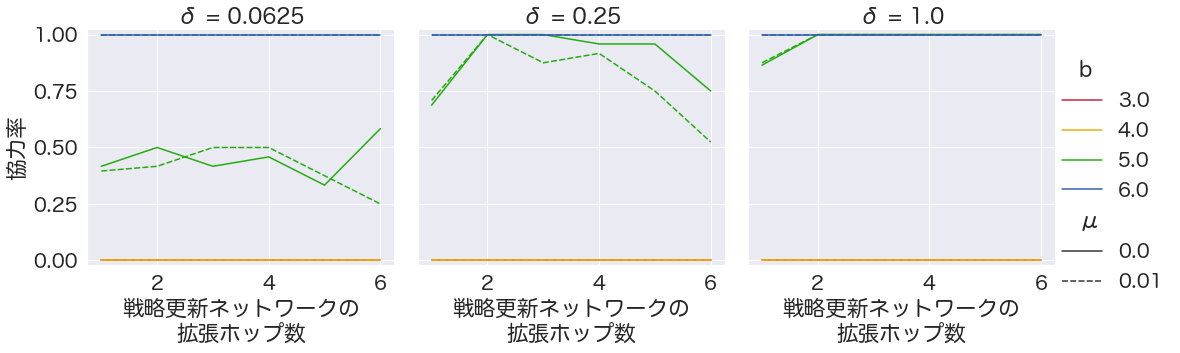


regular_4, Group, IM


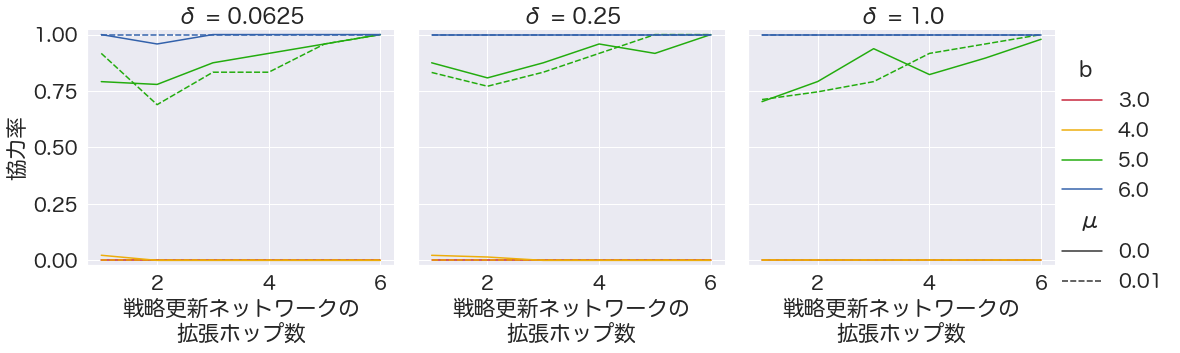


scale_free_4, Group, BD


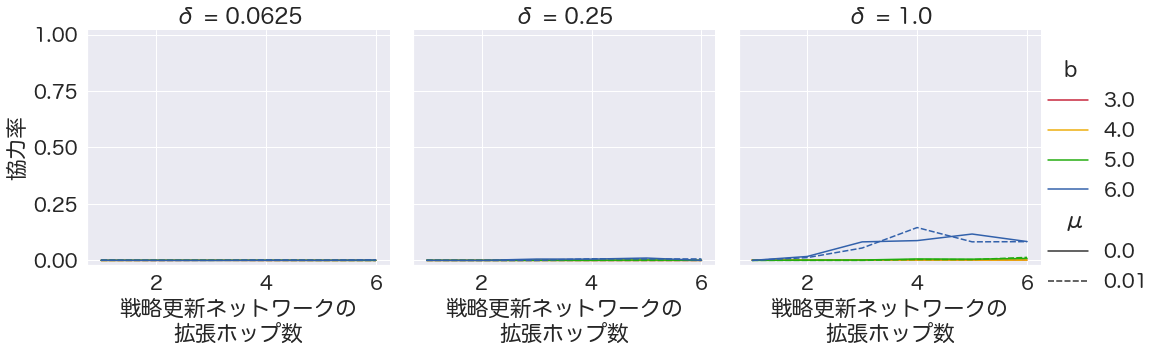


scale_free_4, Group, DB


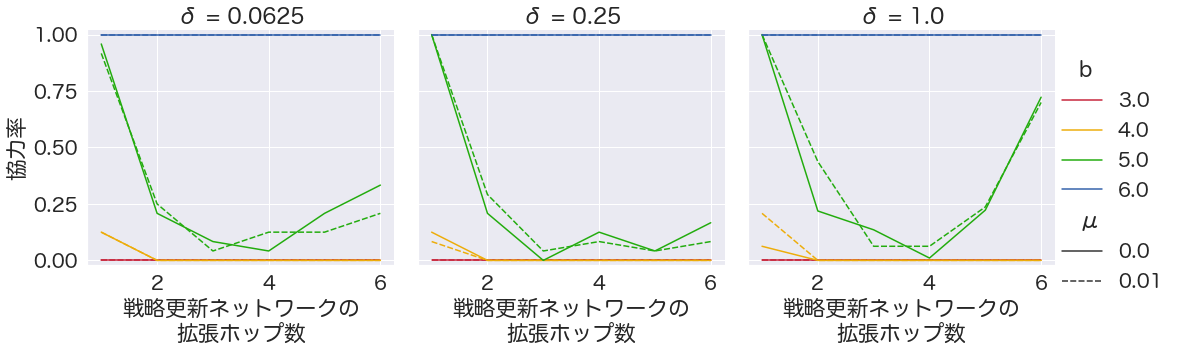


scale_free_4, Group, IM


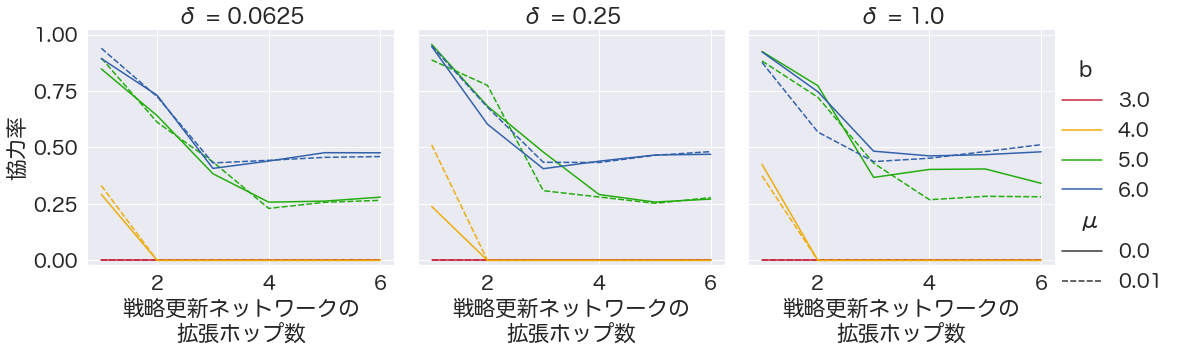

In [5]:
for (_, network_type, interaction_rule, update_rule) in df[['network_type', 'interaction_rule', 'update_rule']].drop_duplicates().itertuples():
    _df = df[
        (df.network_type == network_type) &
        (df.interaction_rule == interaction_rule) &
        (df.update_rule == update_rule) &
        (df.hop_game == 1)
    ][[
        'hop_game', 'hop_learning', 'b', 'δ', 'μ', 'cooperator_rate'
    ]].reset_index(drop=True)
    g = sns.relplot(kind='line', x='hop_learning', y='cooperator_rate', hue='b', col='δ', style='μ', palette=palette4, data=_df)
    g.set_axis_labels('戦略更新ネットワークの\n拡張ホップ数', '協力率')
    g.set(ylim=(-0.02, 1.02))
    print('\n{}, {}, {}'.format(network_type, interaction_rule, update_rule))
    plt.show()

# Pairwise Interaction

In [6]:
%%time
dir_names = ['clean_data']
file_list = list(itertools.chain.from_iterable([glob.glob('../data/{}/*.csv'.format(dir_name)) for dir_name in dir_names]))
df_list = [load_df(file) for file in file_list]
df_raw = pd.concat(df_list).reset_index(drop=True)
df = df_raw.groupby(GROUPBY_COLUMNS).agg({'cooperator_rate': [len, np.mean, np.std]}).reset_index()
df.columns = GROUPBY_COLUMNS + ['trial', 'cooperator_rate', 'std']
df = df[
    (df.interaction_rule == 'PairWise') &
    (df.hop_game <= 6) &
    (df.hop_learning <= 6) &
    (df.b.isin([1.1, 1.2, 1.3, 1.4]))
]
df

CPU times: user 613 ms, sys: 46.3 ms, total: 659 ms
Wall time: 658 ms


network_type  hop_game  hop_learning    b     μ     δ interaction_rule  \
0          random_4         1             1  1.1  0.00  0.01         PairWise   
1          random_4         1             1  1.1  0.00  0.01         PairWise   
2          random_4         1             1  1.1  0.00  0.01         PairWise   
3          random_4         1             1  1.1  0.00  0.10         PairWise   
4          random_4         1             1  1.1  0.00  0.10         PairWise   
...             ...       ...           ...  ...   ...   ...              ...   
28819  scale_free_4         6             6  1.4  0.01  0.50         PairWise   
28820  scale_free_4         6             6  1.4  0.01  0.50         PairWise   
28821  scale_free_4         6             6  1.4  0.01  1.00         PairWise   
28822  scale_free_4         6             6  1.4  0.01  1.00         PairWise   
28823  scale_free_4         6             6  1.4  0.01  1.00         PairWise   

      update_rule  trial  cooperator_rate       std  
0              BD      1         0.000261       NaN  
1              DB      3         0.152778  0.031823  
2              IM      2         0.063659  0.086750  
3              BD      1         0.000585       NaN  
4              DB      2         0.000000  0.000000  
...           ...    ...              ...       ...  
28819          DB      1         0.000000       NaN  
28820          IM      1         0.000000       NaN  
28821          BD      1         0.000000       NaN  
28822          DB      1         0.000000       NaN  
28823          IM      1         0.000000       NaN  

[10368 rows x 11 columns]


random_4, PairWise, BD


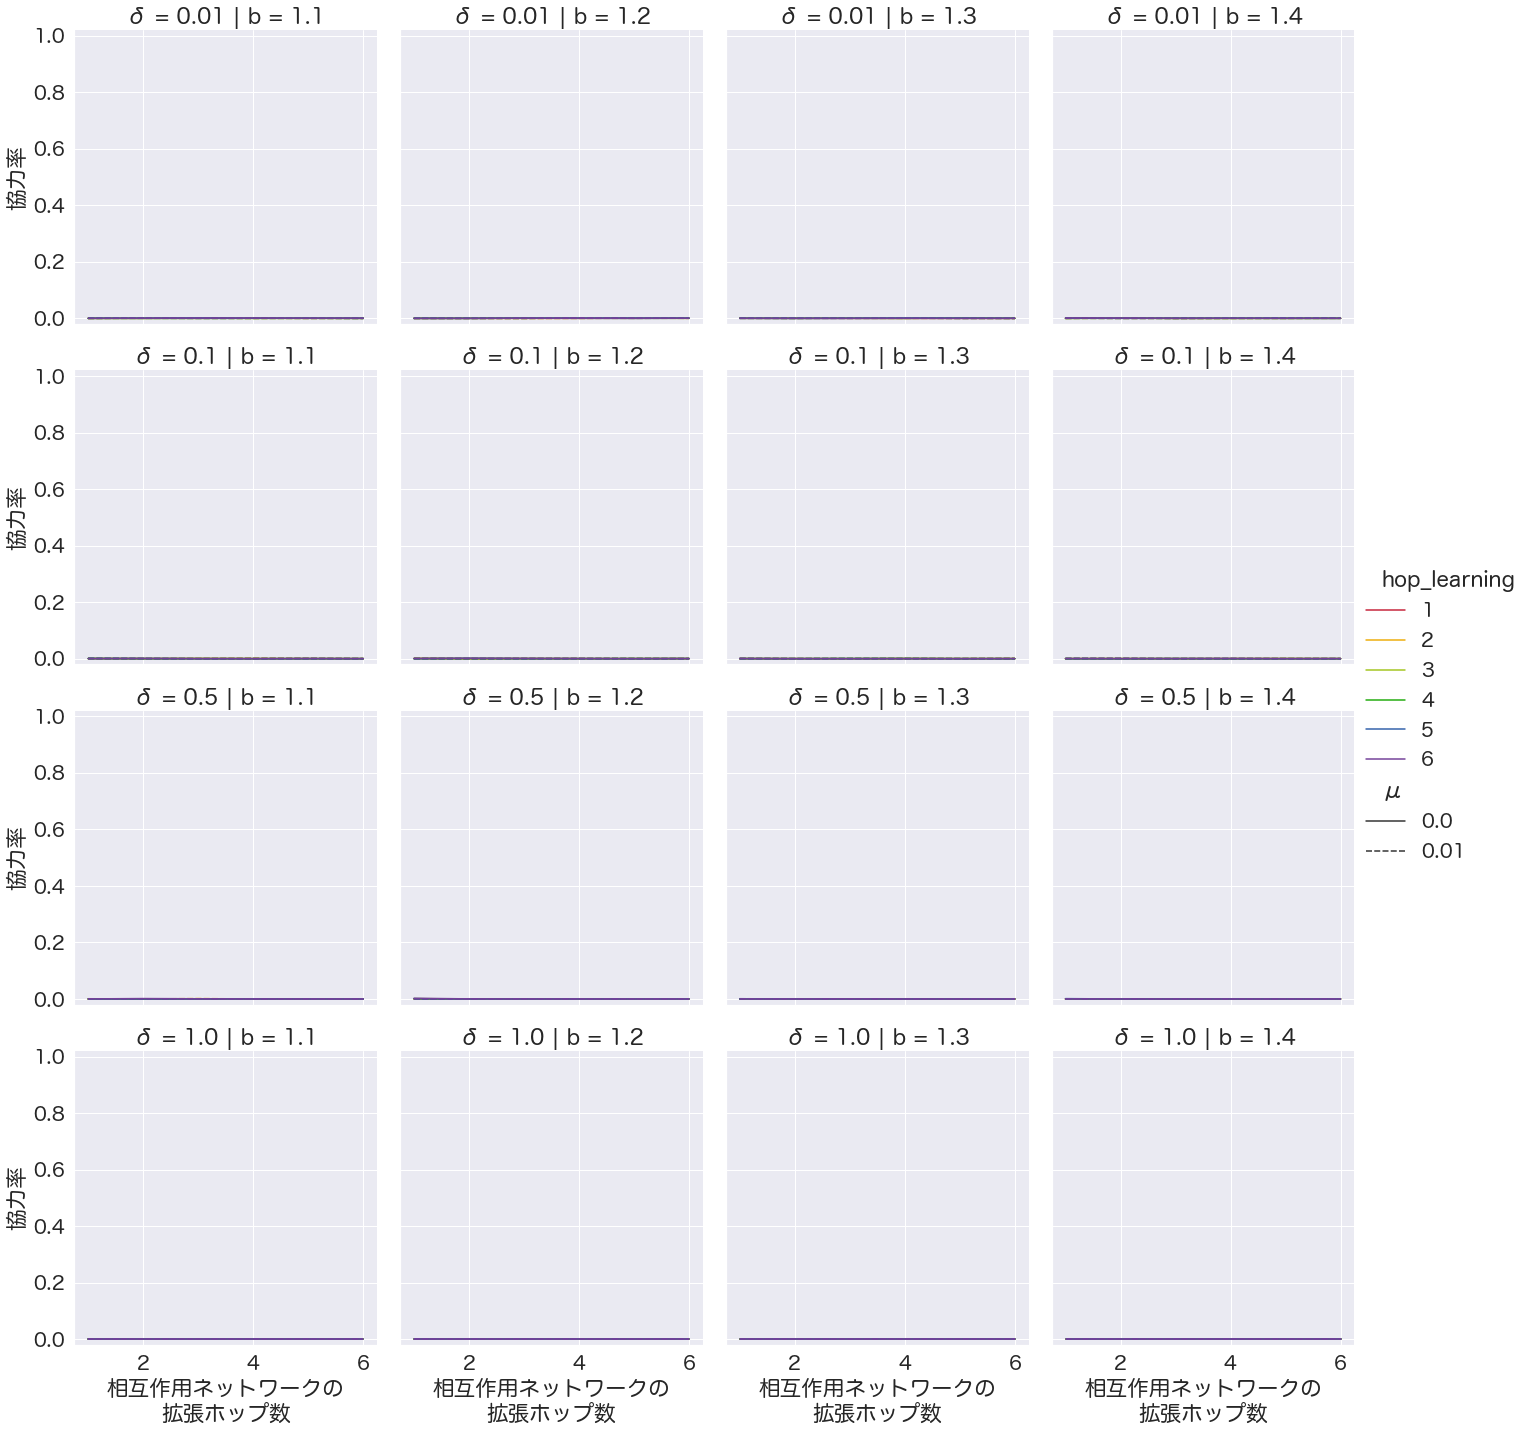


random_4, PairWise, DB


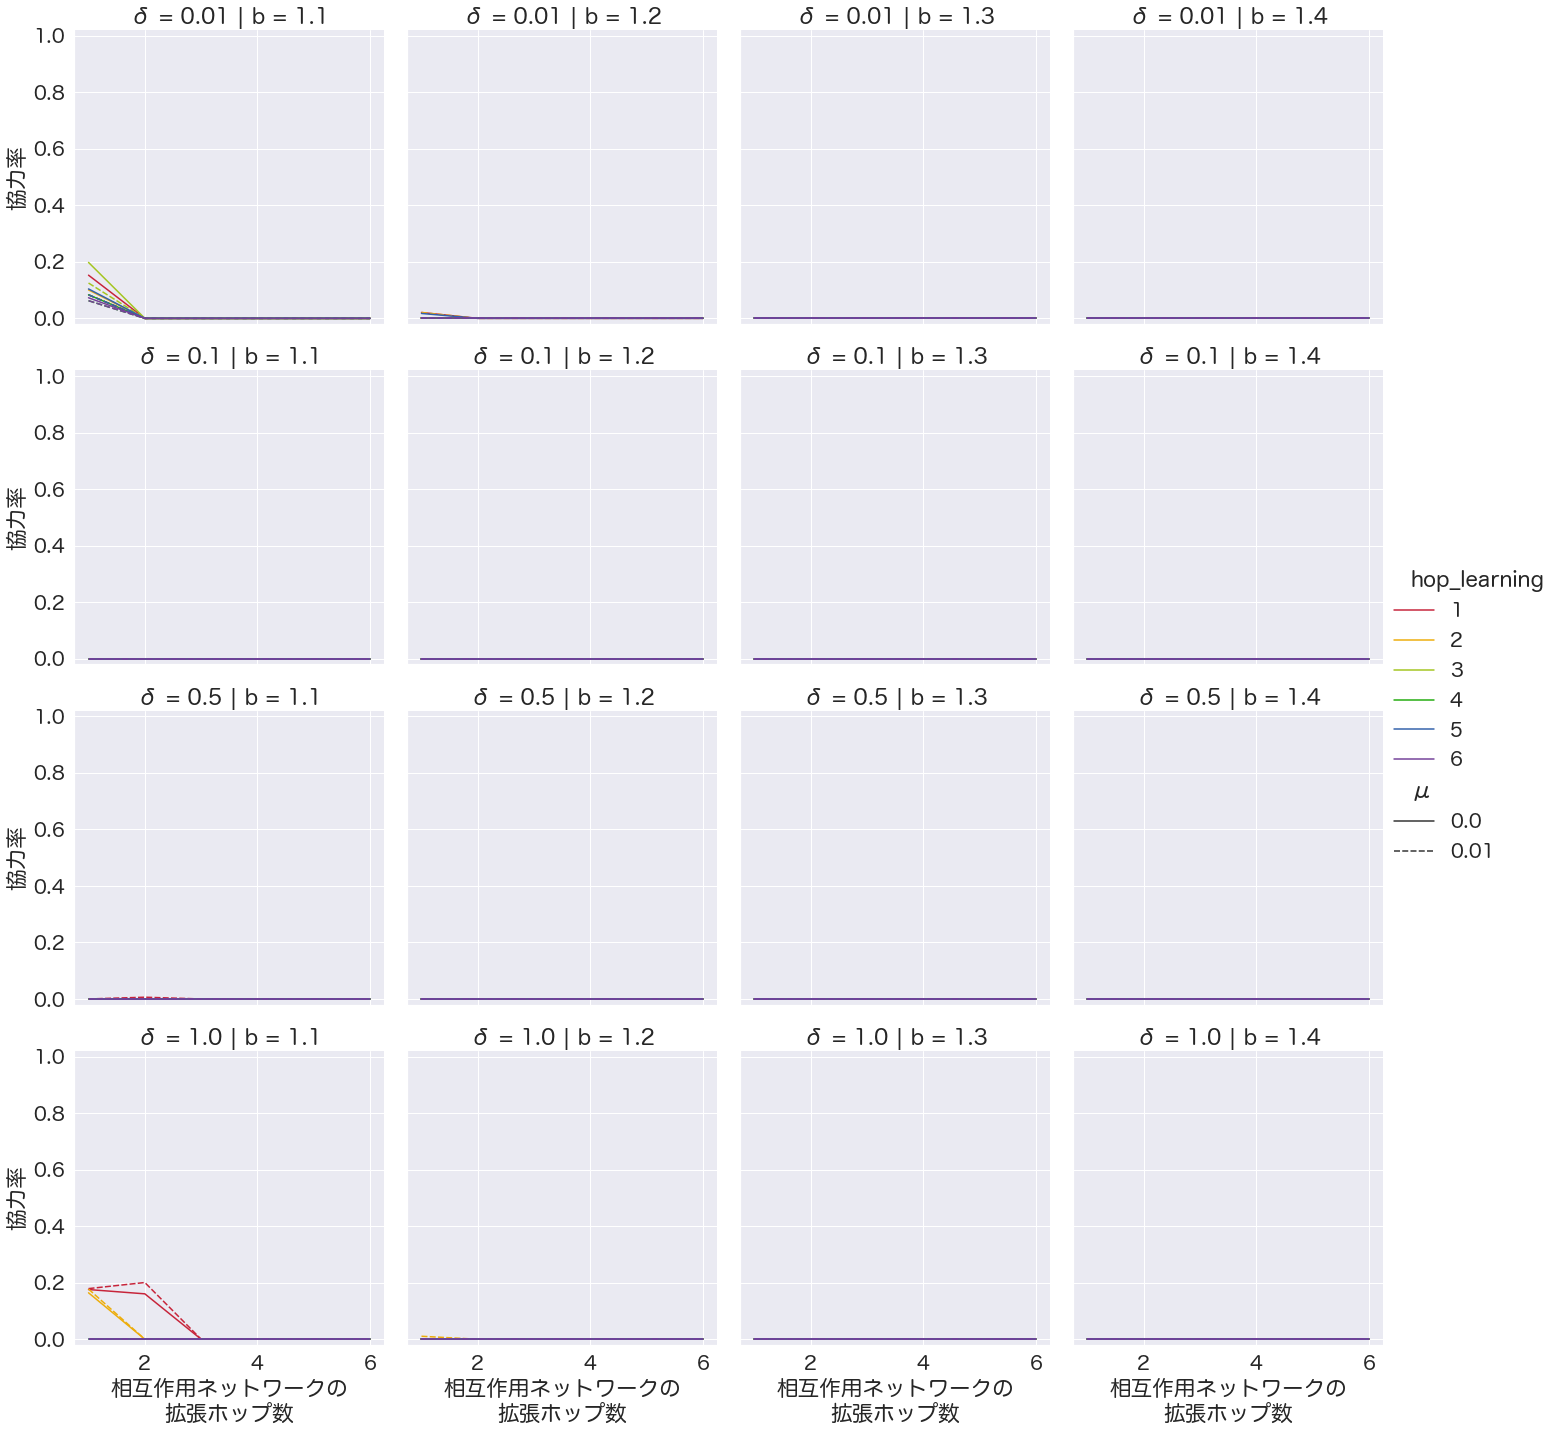


random_4, PairWise, IM


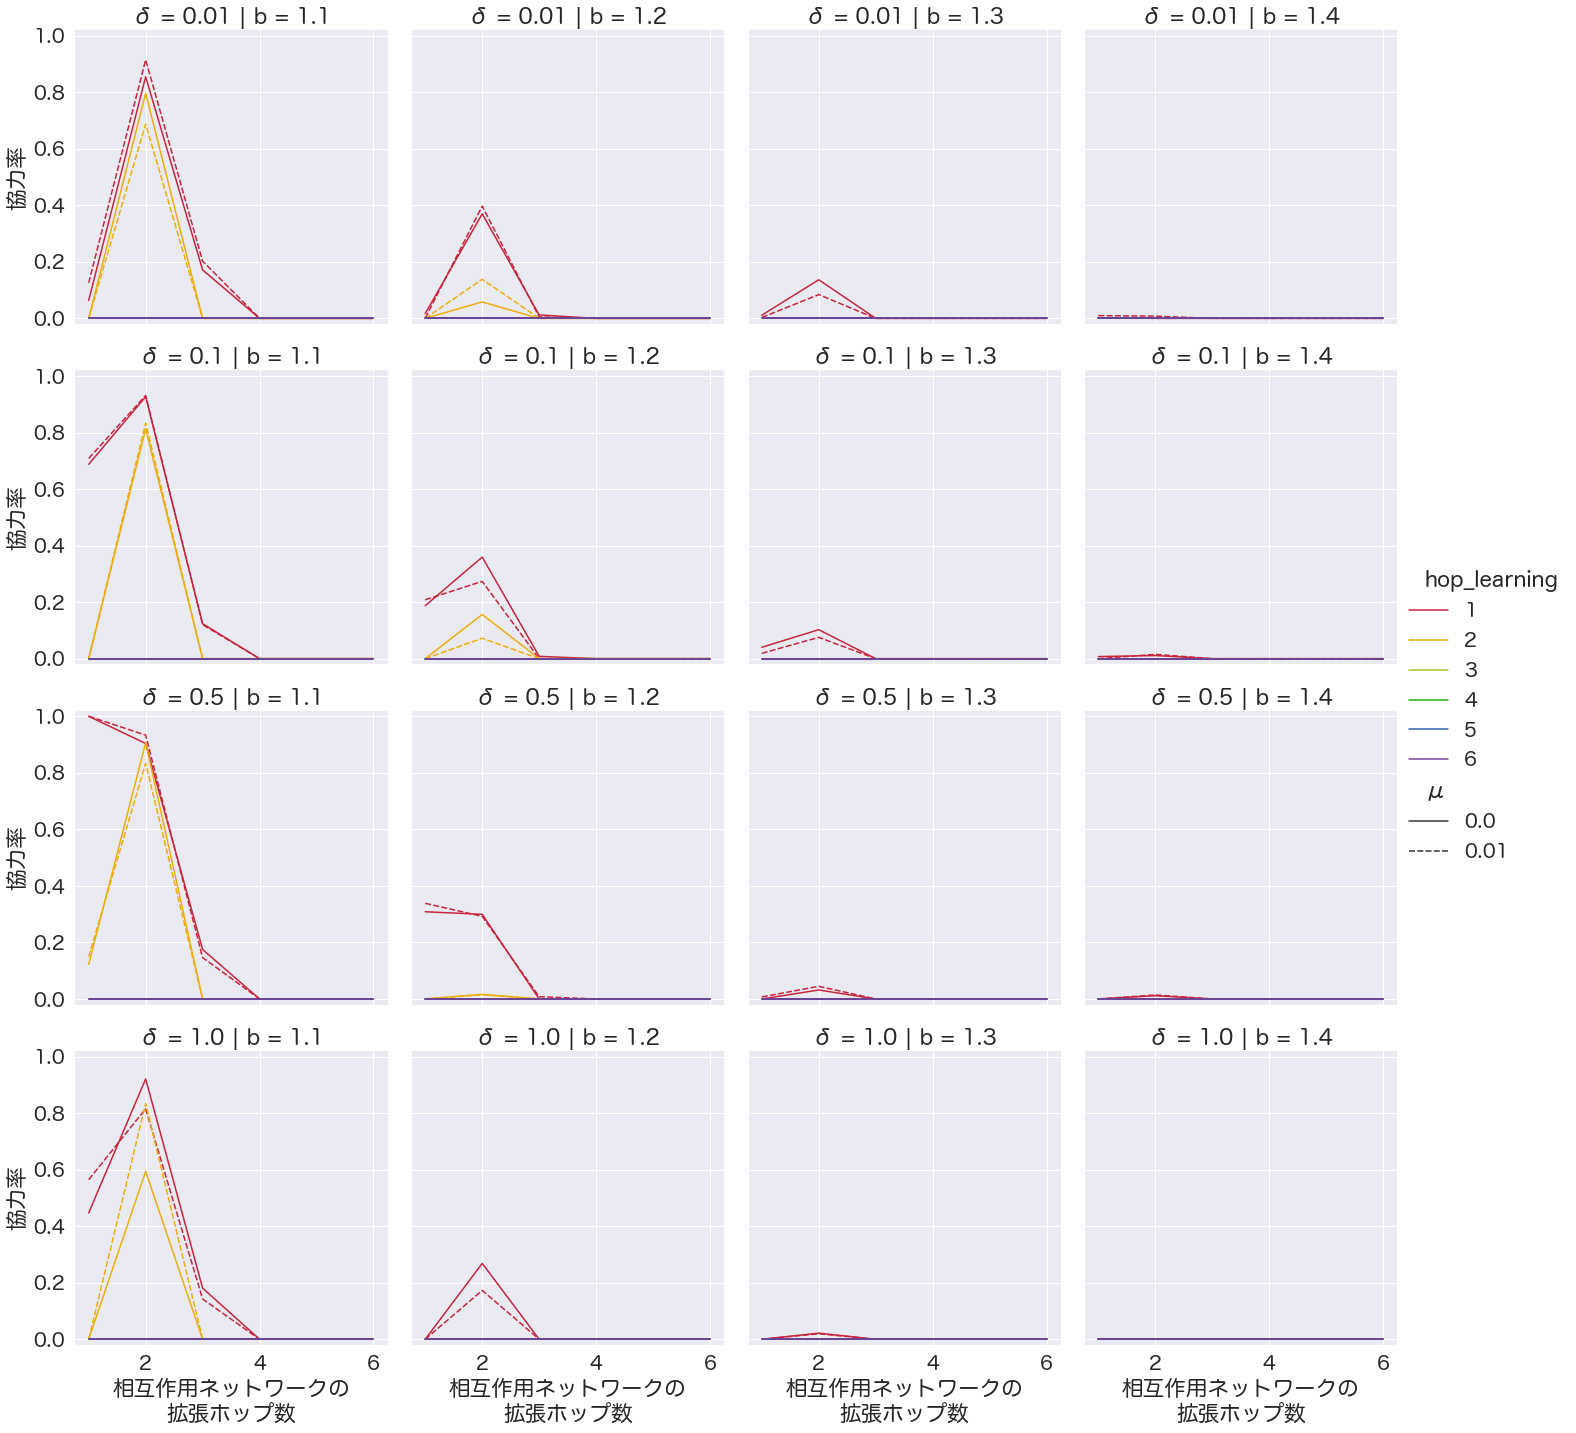


regular_4, PairWise, BD


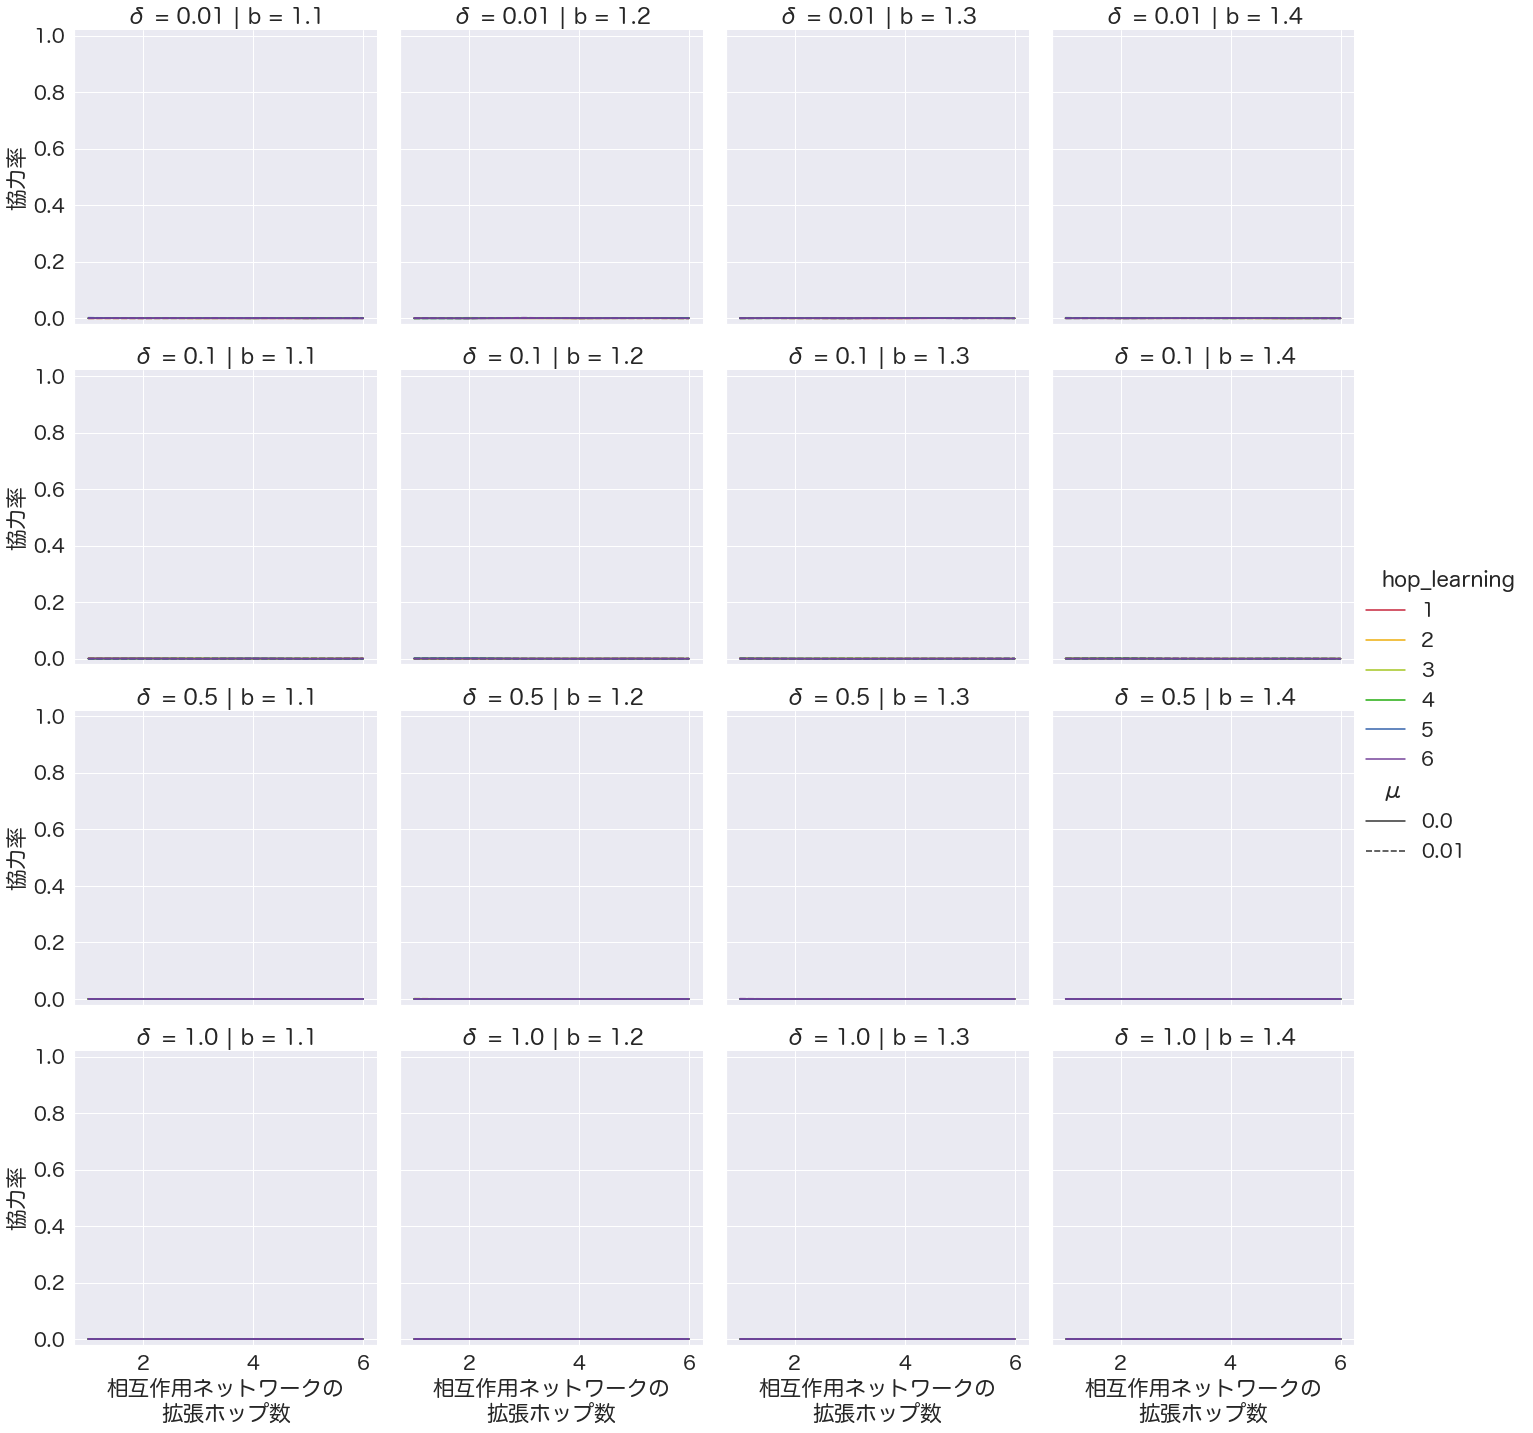


regular_4, PairWise, DB


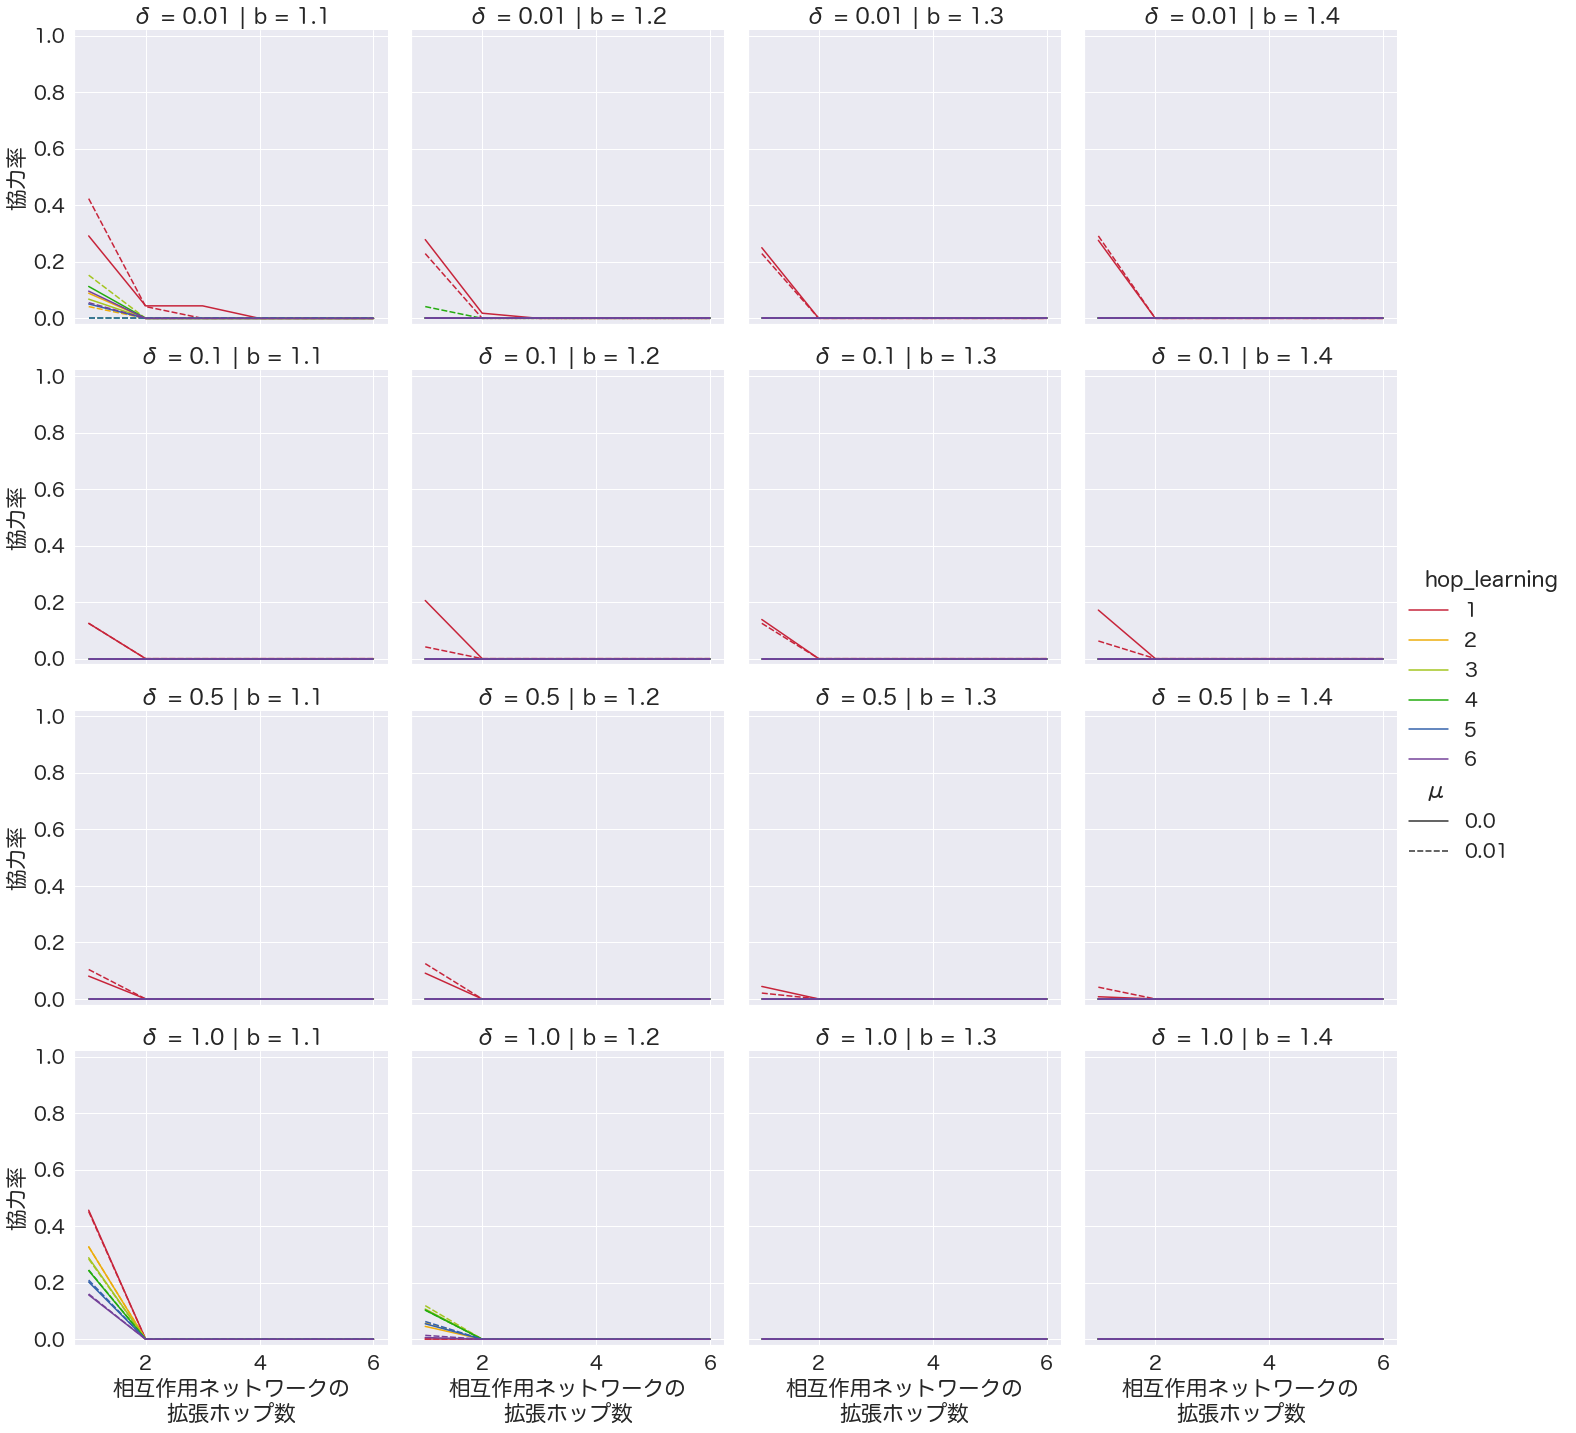


regular_4, PairWise, IM


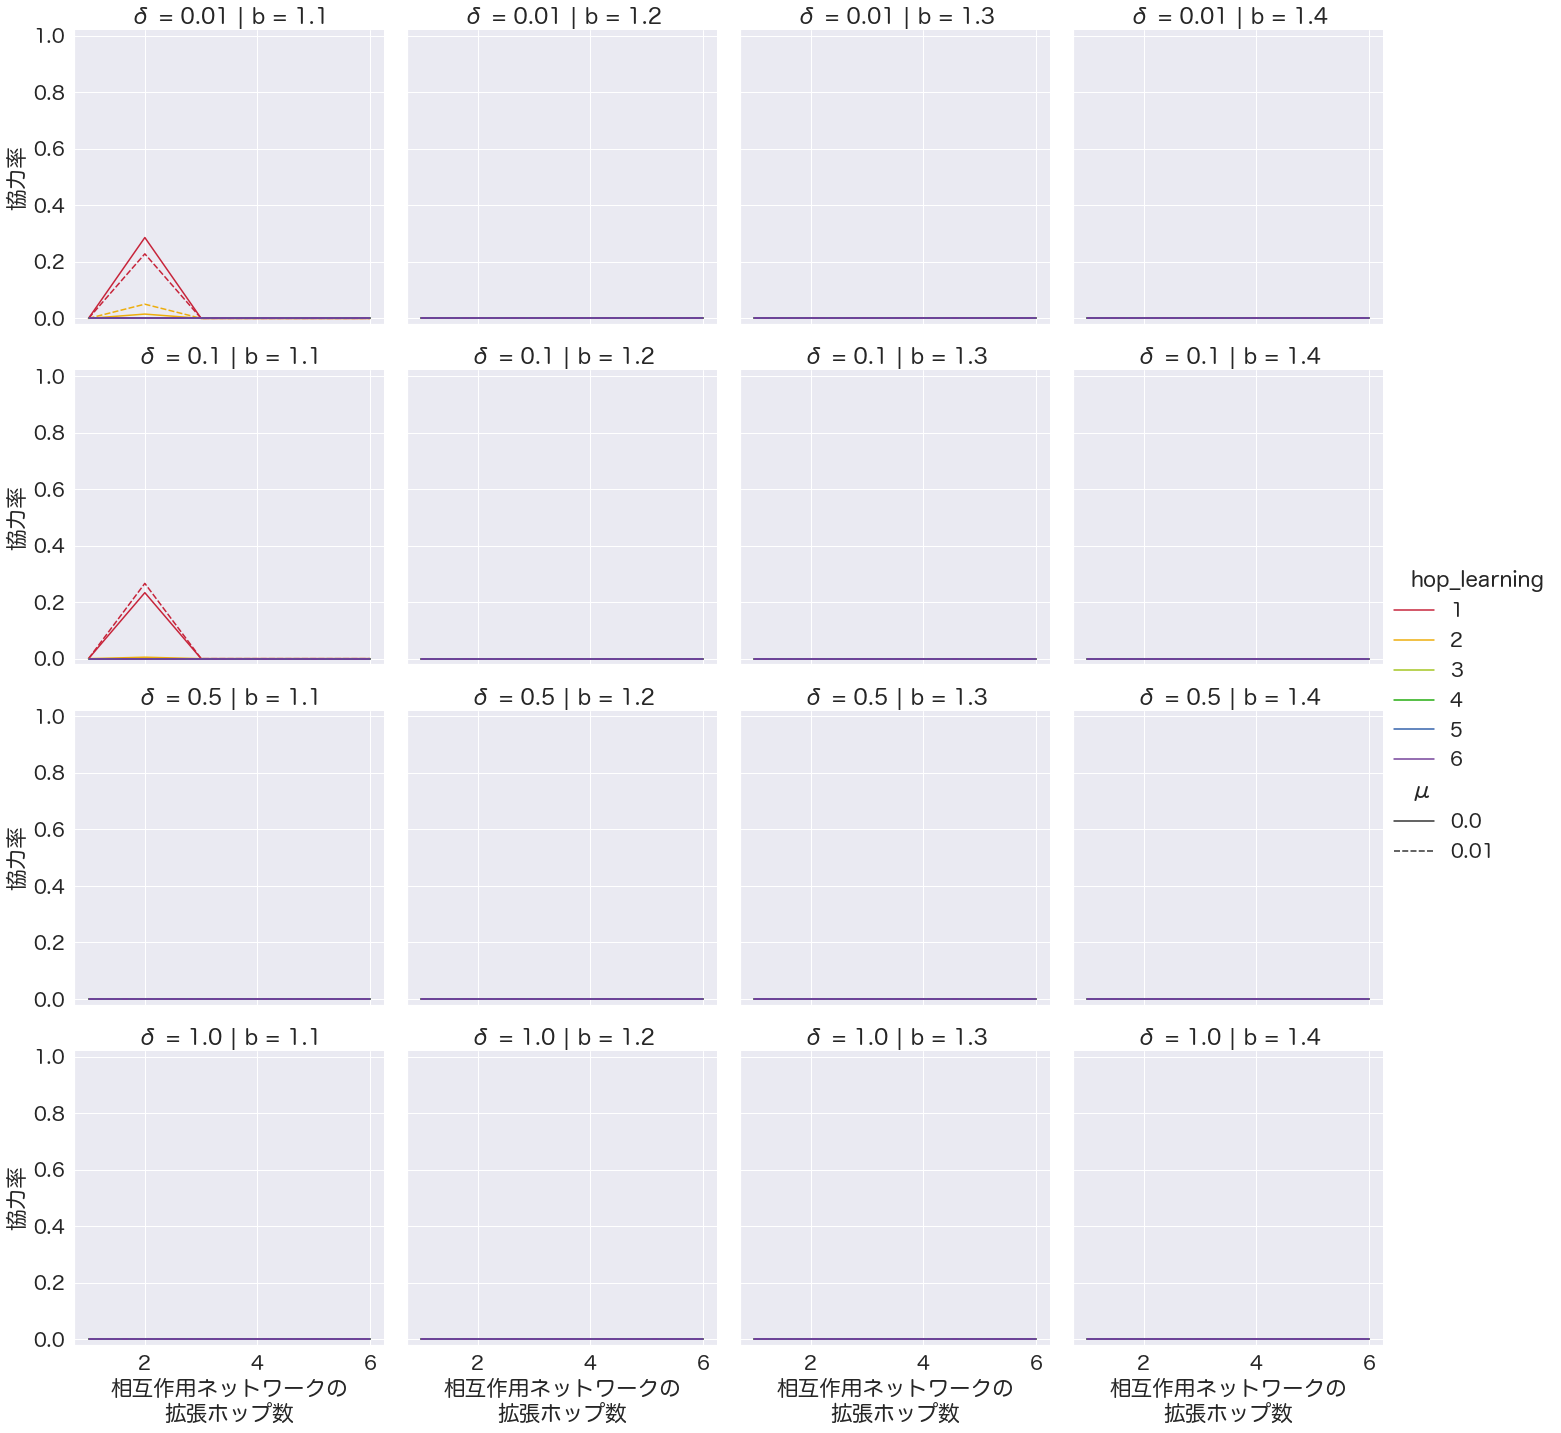


scale_free_4, PairWise, BD


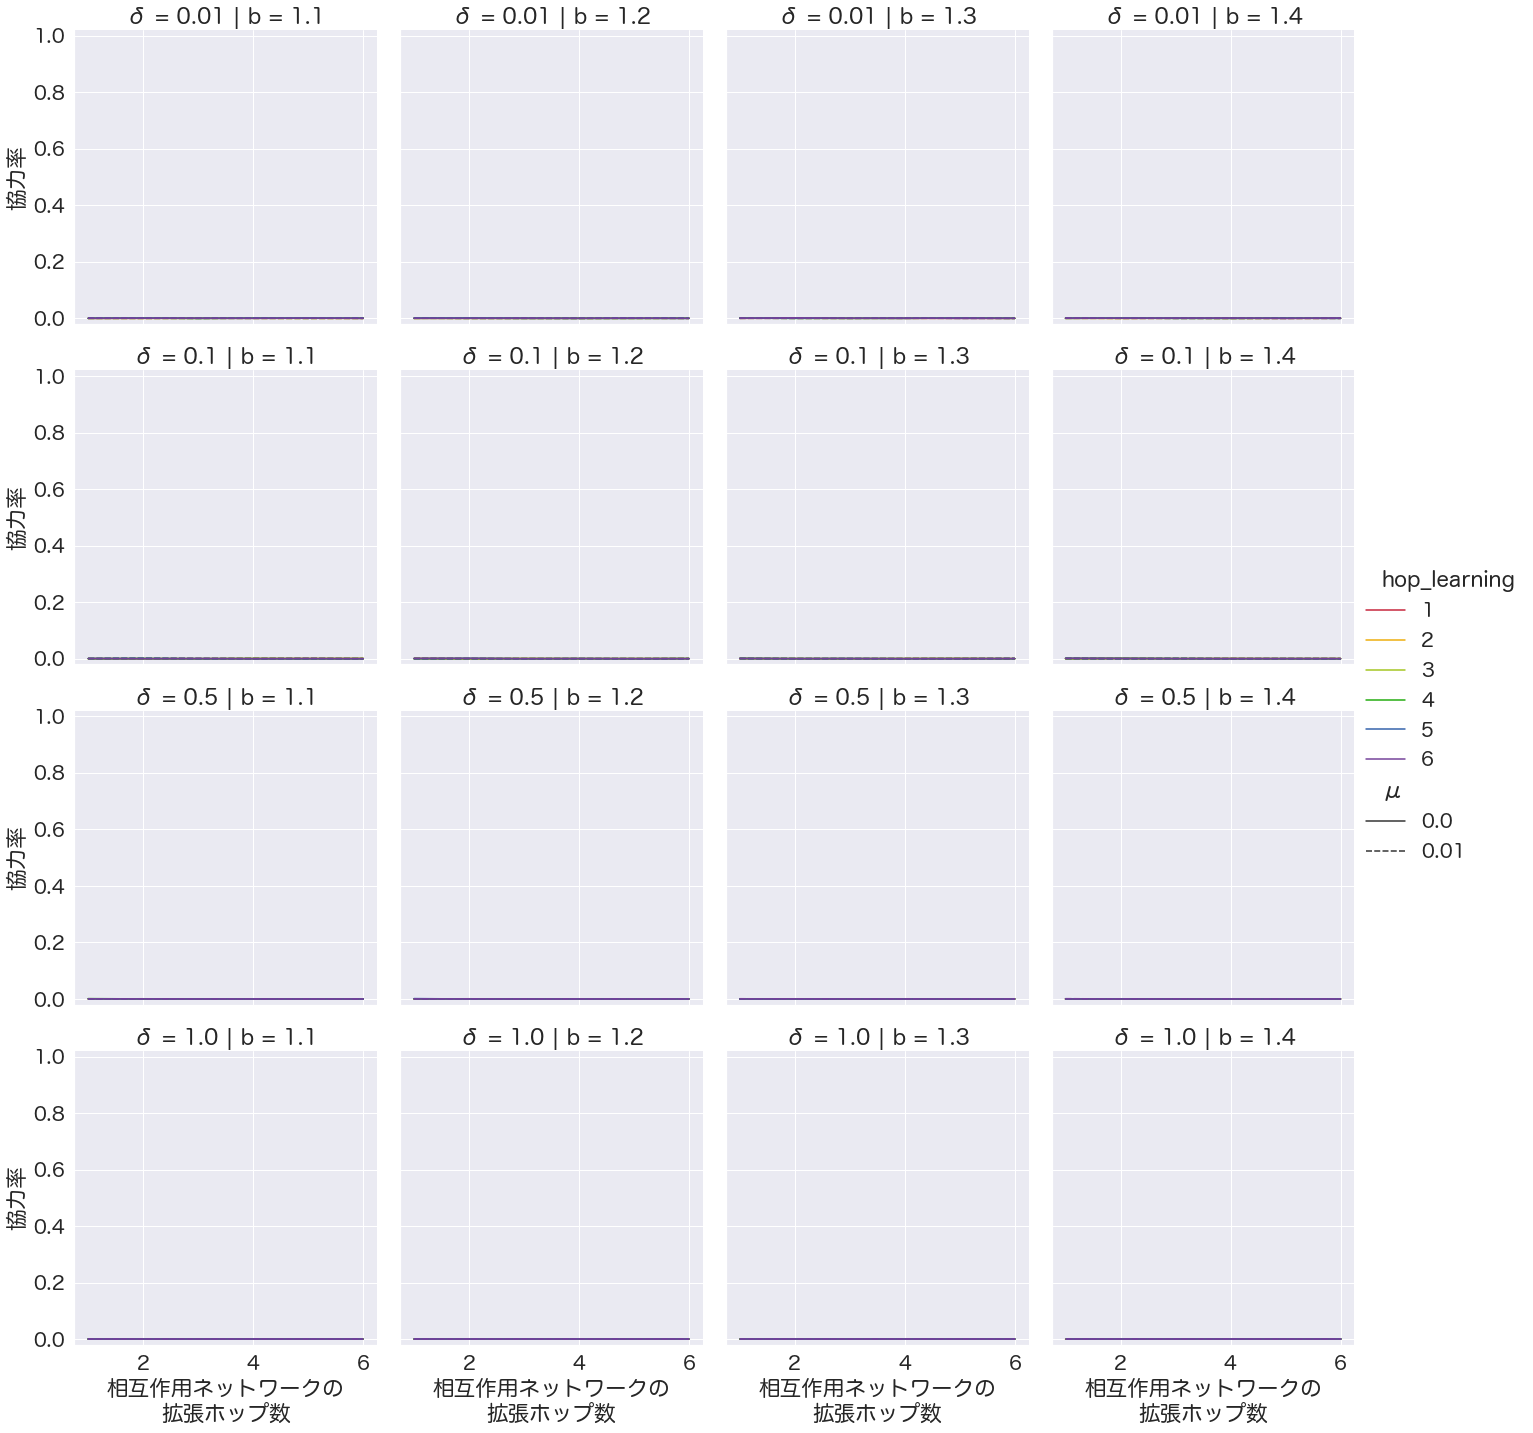


scale_free_4, PairWise, DB


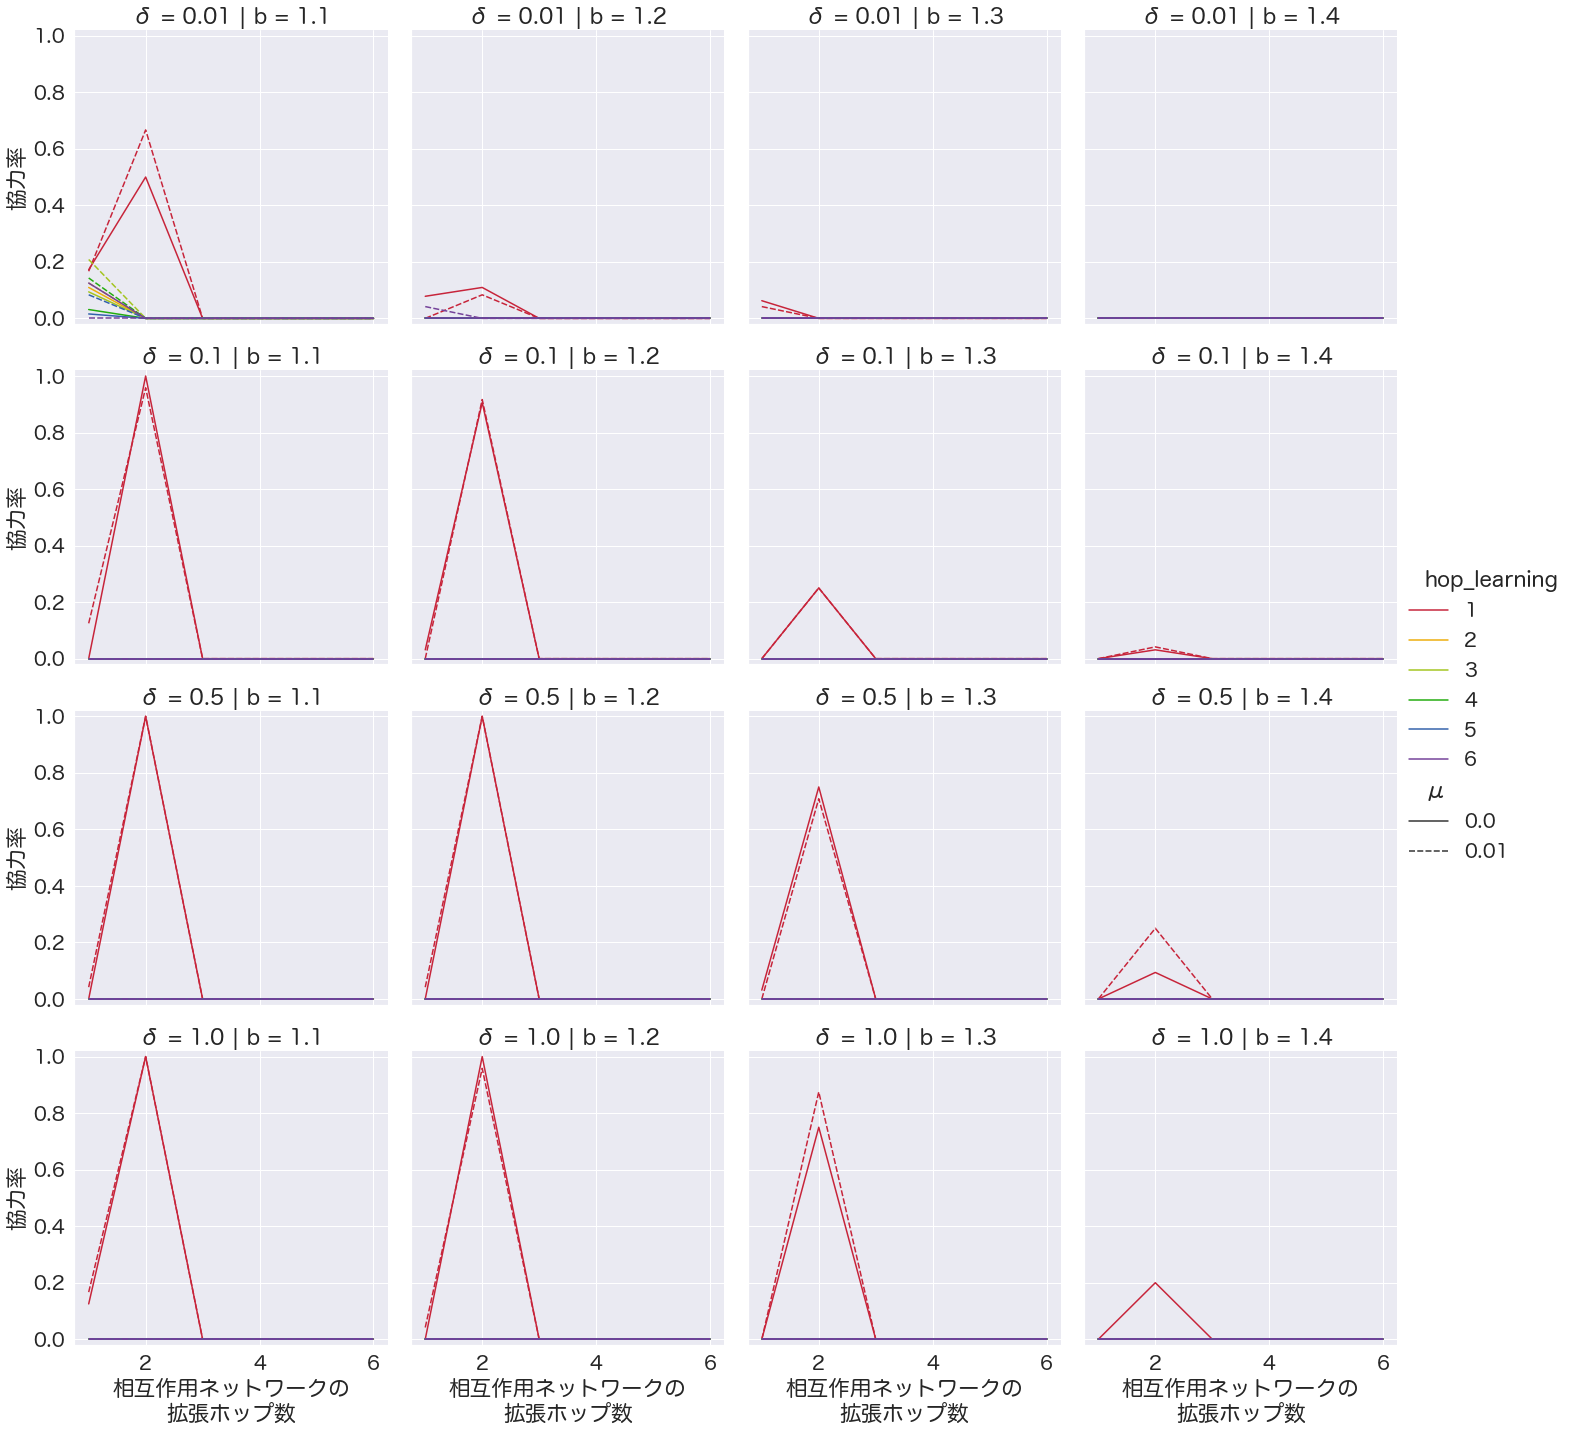


scale_free_4, PairWise, IM


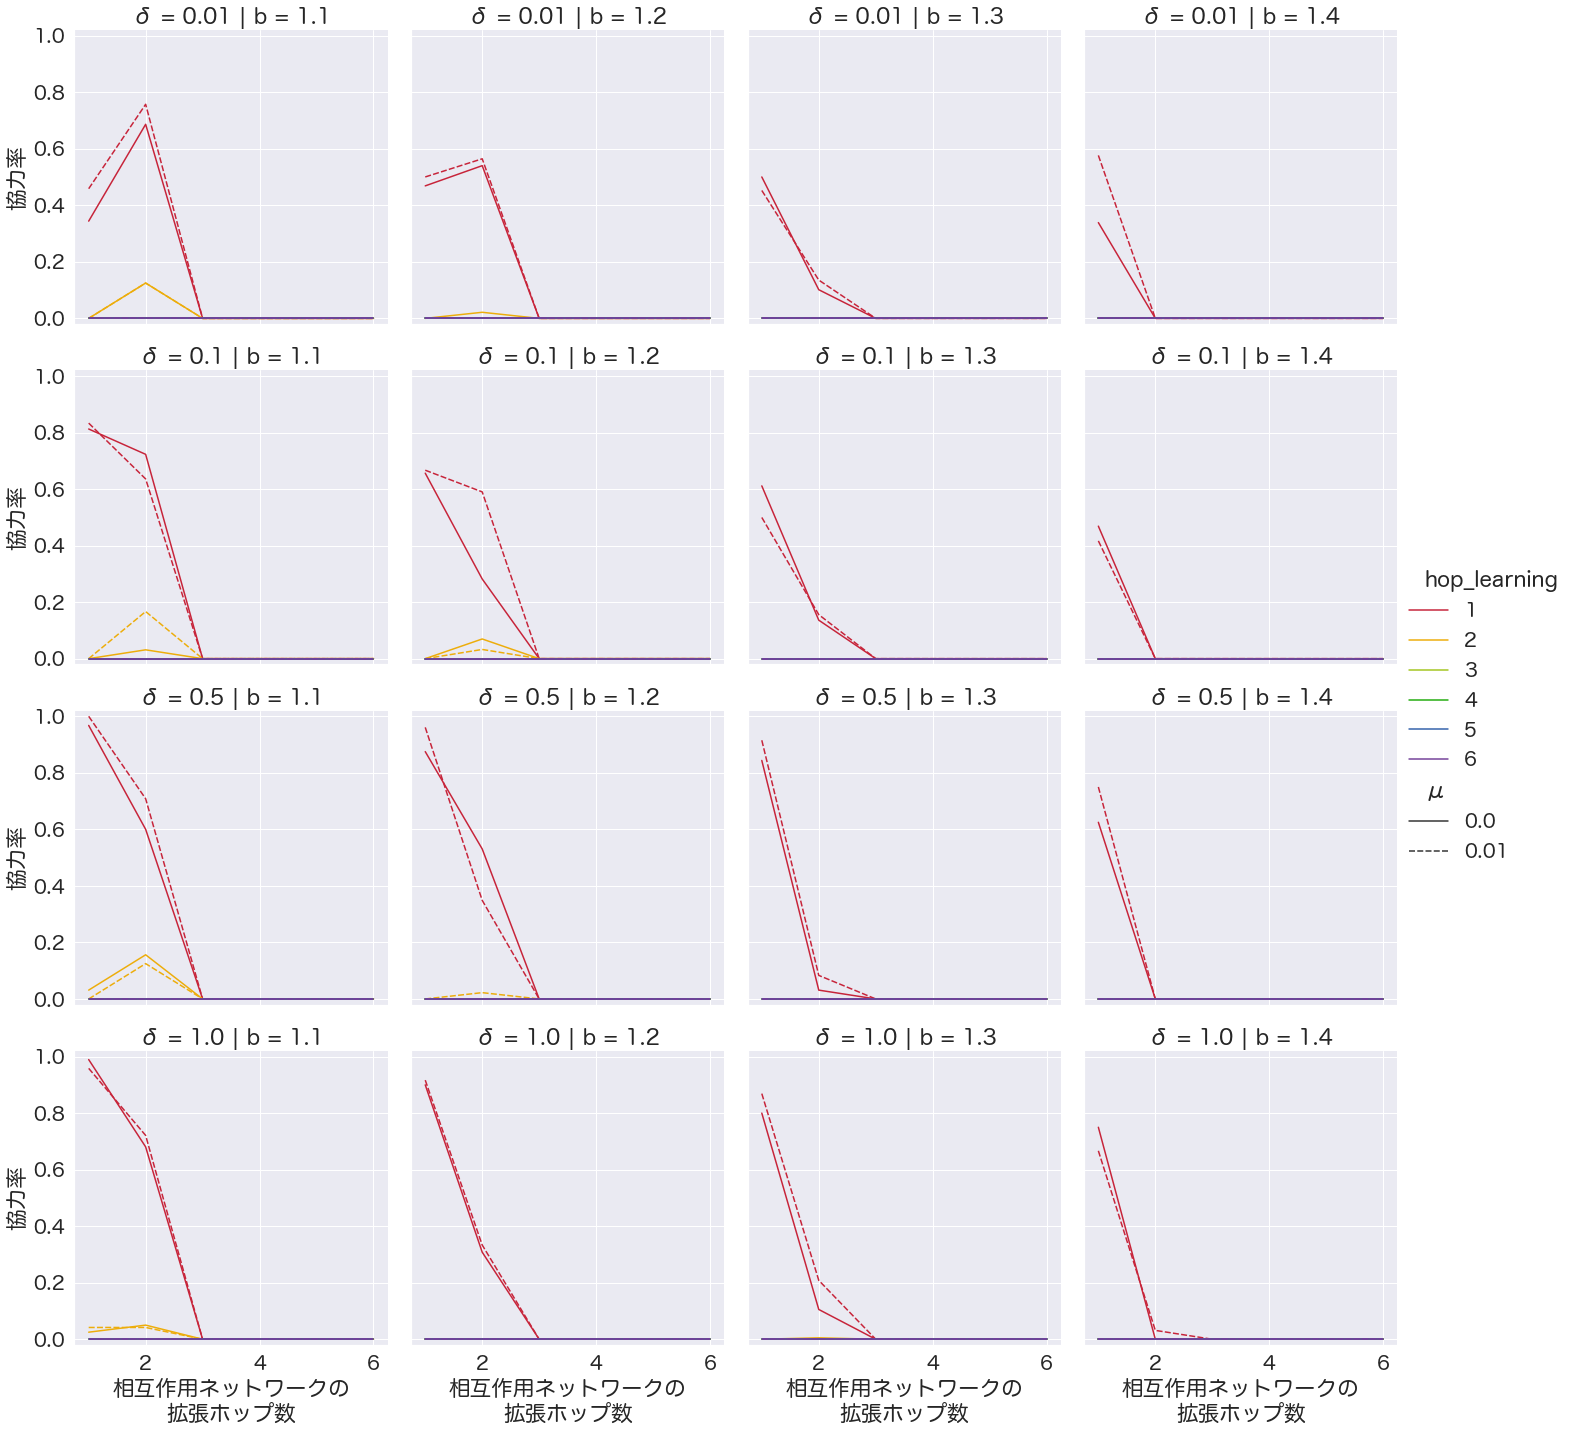

In [7]:
for (_, network_type, interaction_rule, update_rule) in df[['network_type', 'interaction_rule', 'update_rule']].drop_duplicates().itertuples():
    _df = df[(df.network_type == network_type) & (df.interaction_rule == interaction_rule) & (df.update_rule == update_rule)][[
        'hop_game', 'hop_learning', 'b', 'δ', 'μ', 'cooperator_rate'
    ]].reset_index(drop=True)
    g = sns.relplot(kind='line', x='hop_game', y='cooperator_rate', hue='hop_learning', row='δ', col='b', style='μ', palette=palette6, data=_df)
    g.set_axis_labels('相互作用ネットワークの\n拡張ホップ数', '協力率')
    g.set(ylim=(-0.02, 1.02))
    print('\n{}, {}, {}'.format(network_type, interaction_rule, update_rule))
    plt.show()


random_4, PairWise, BD


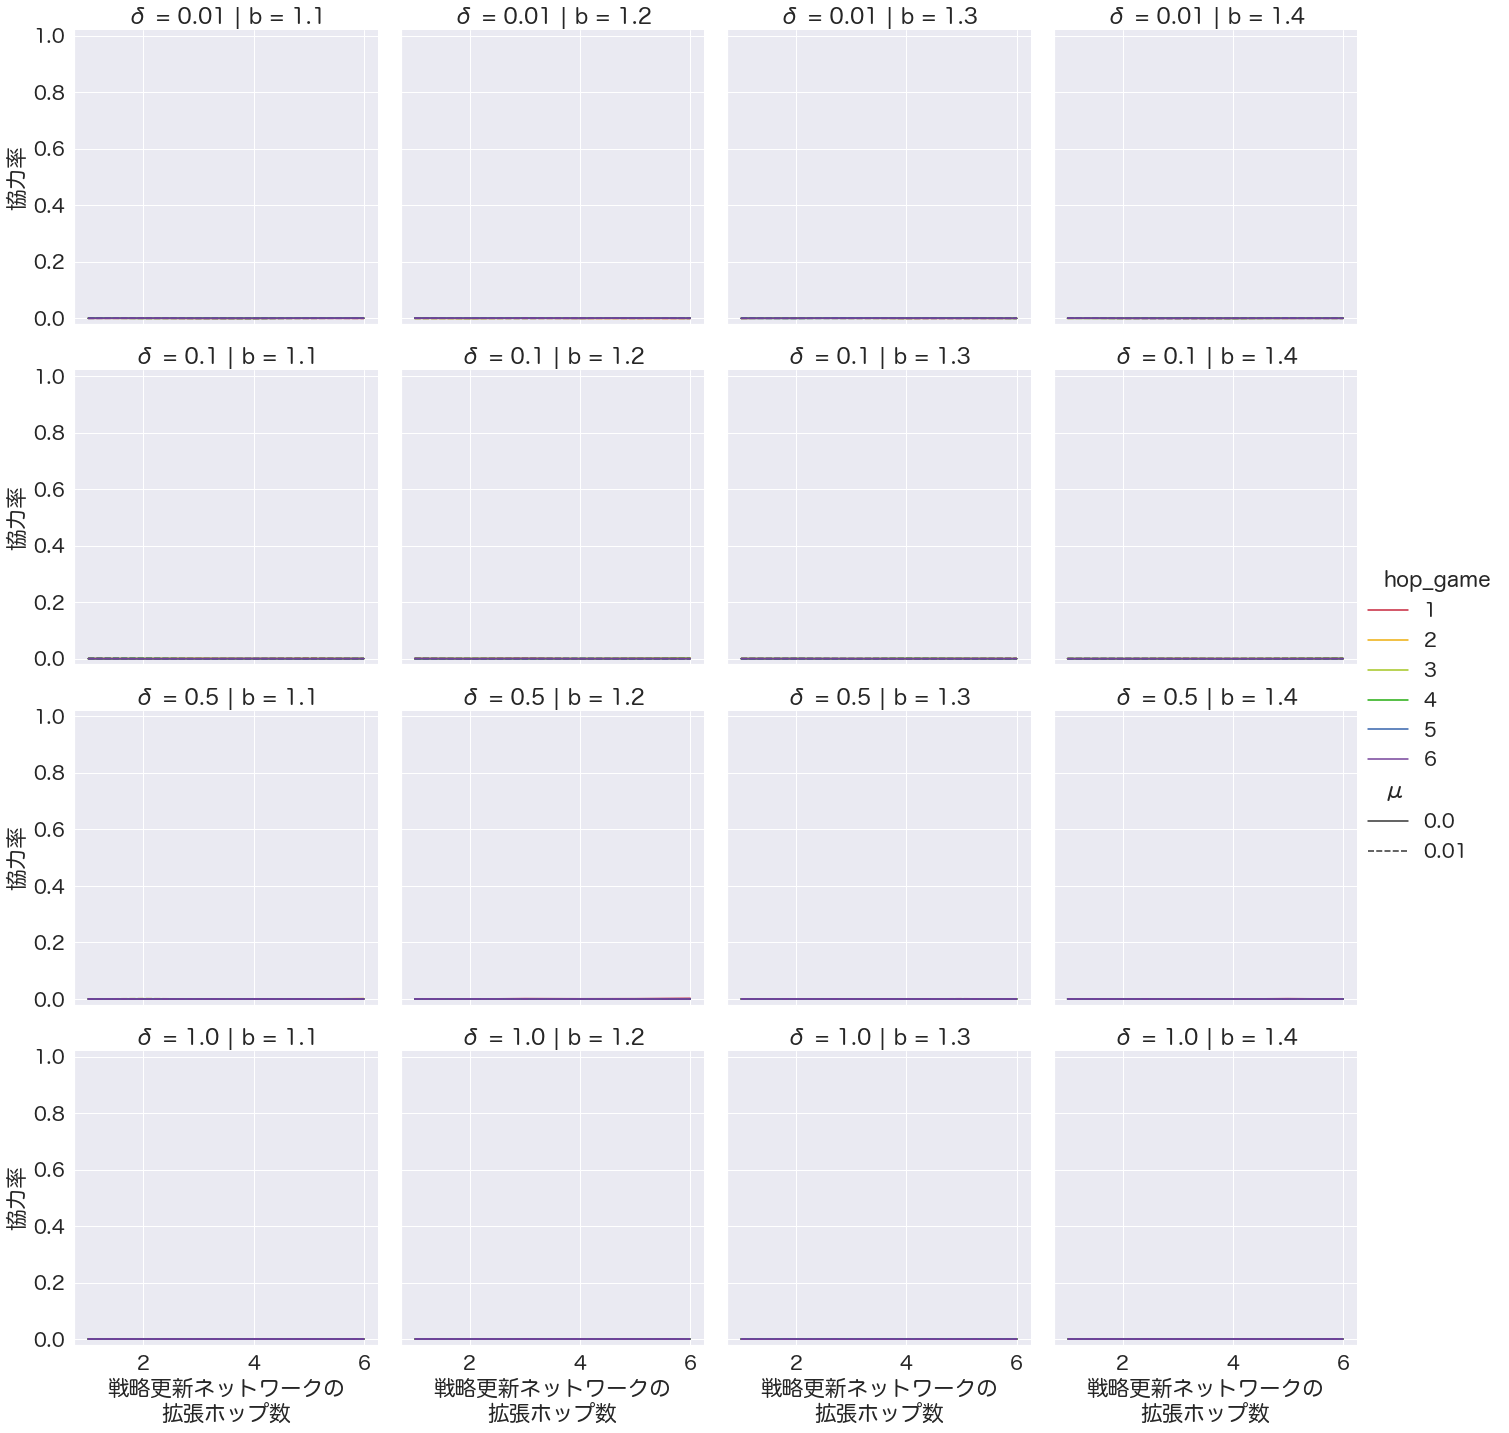


random_4, PairWise, DB


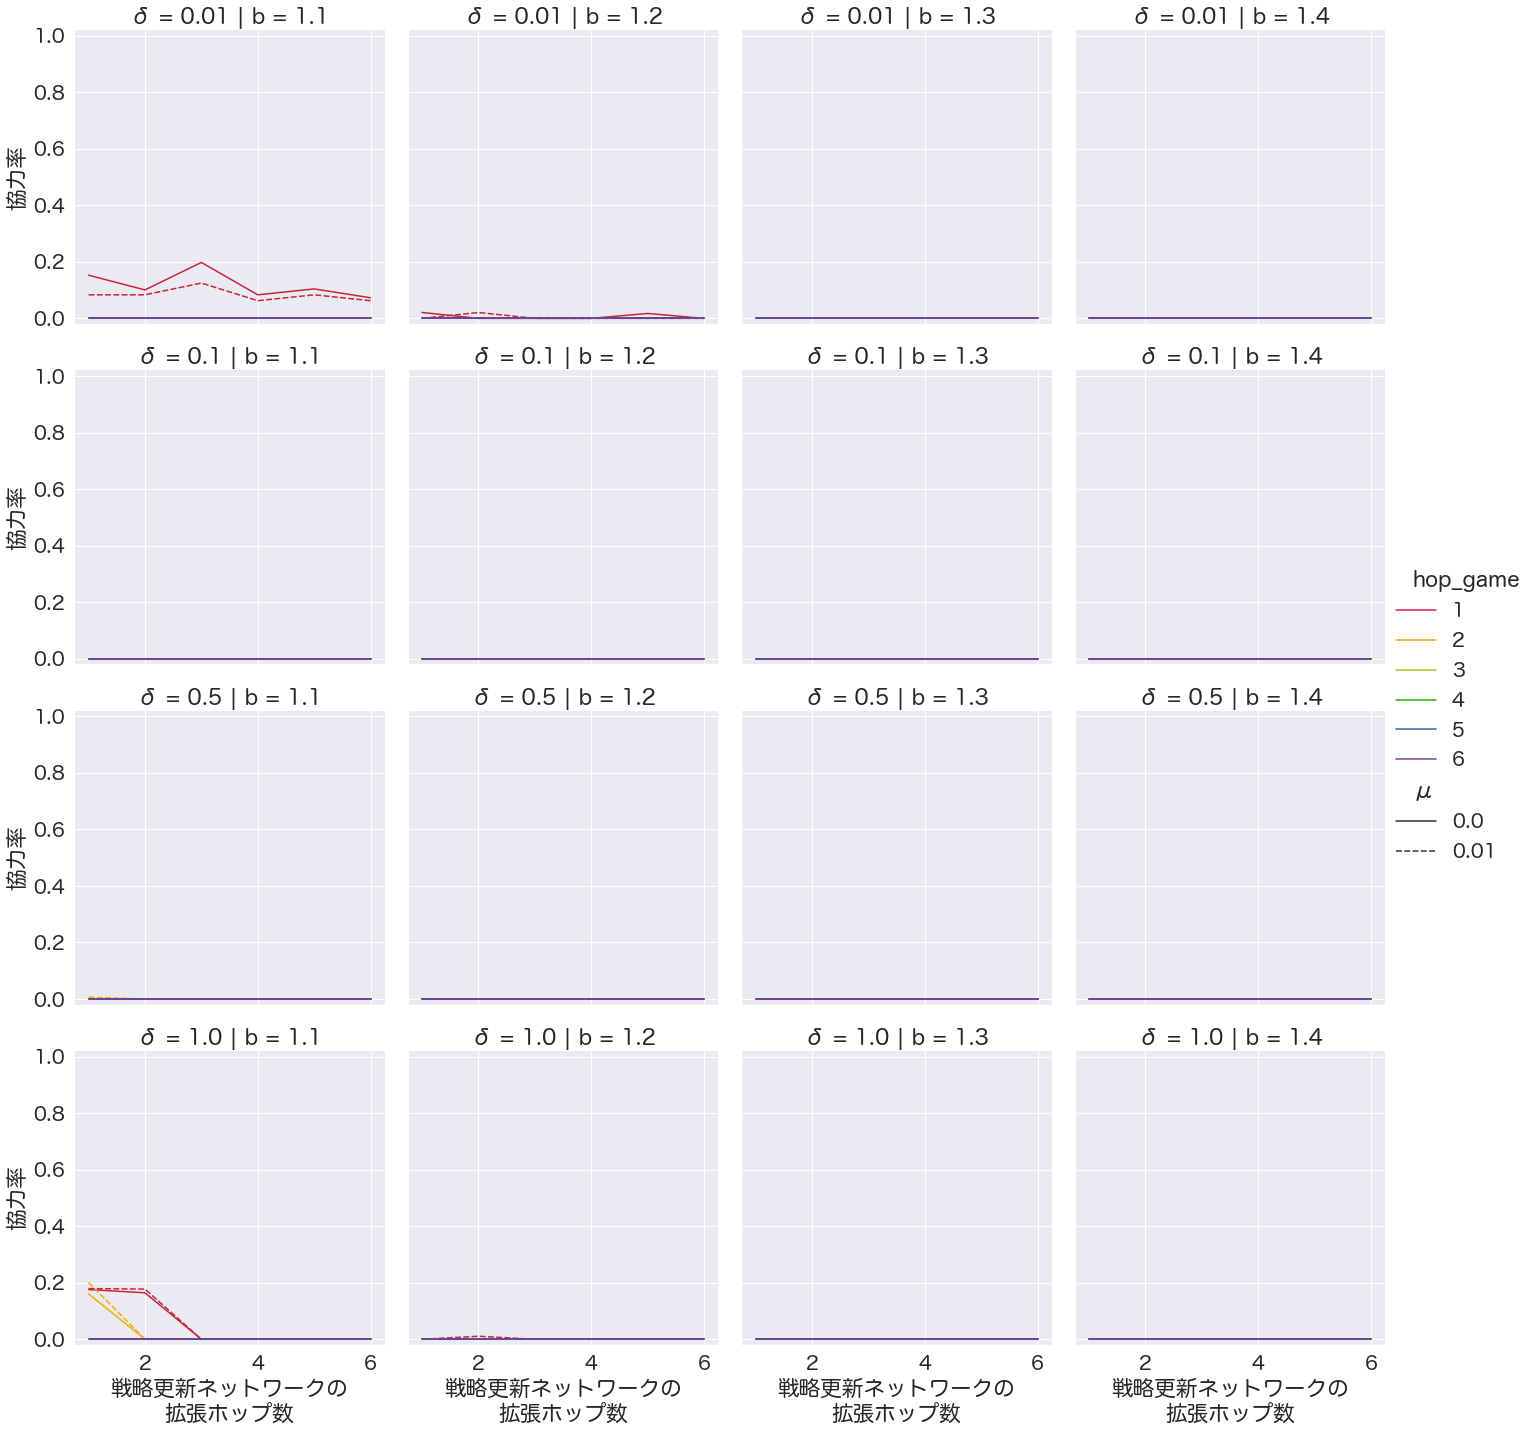


random_4, PairWise, IM


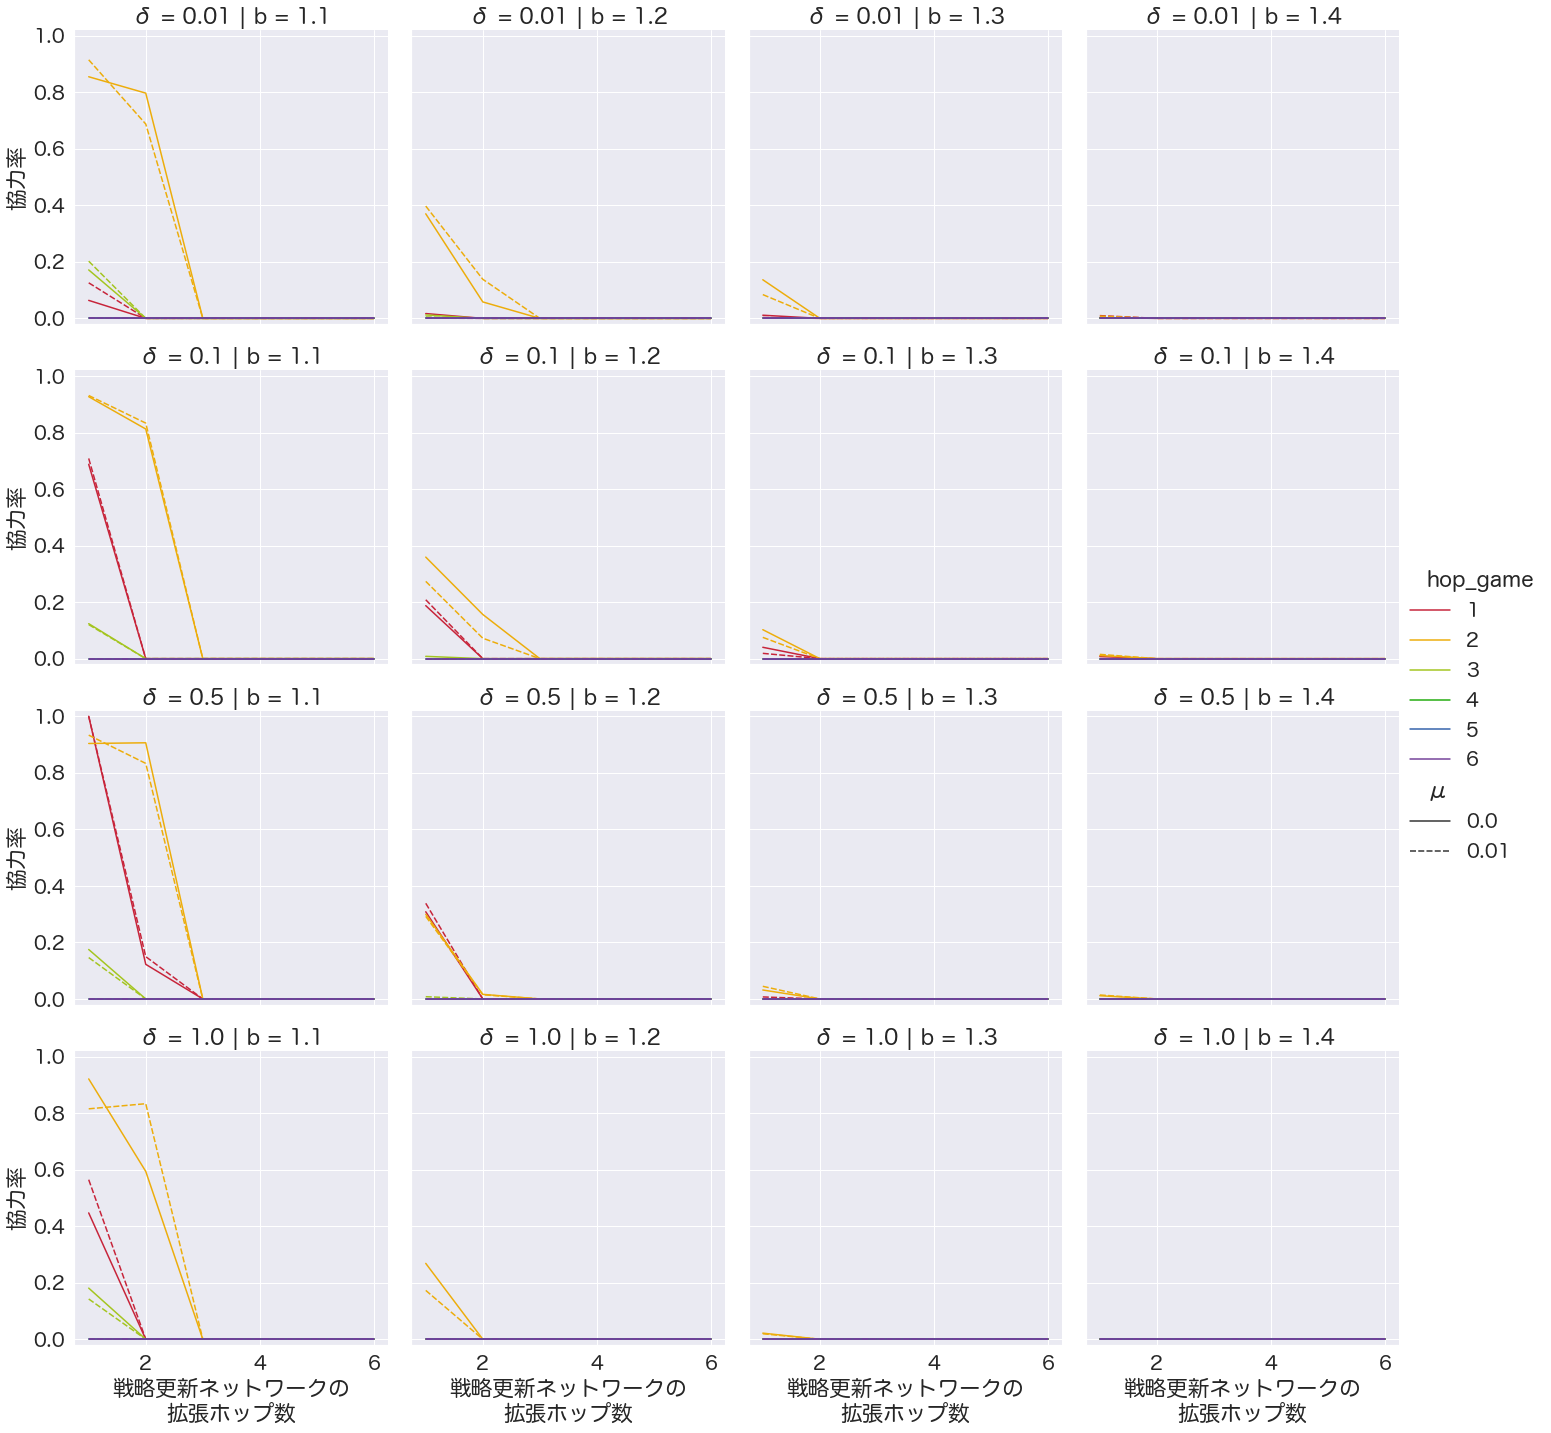


regular_4, PairWise, BD


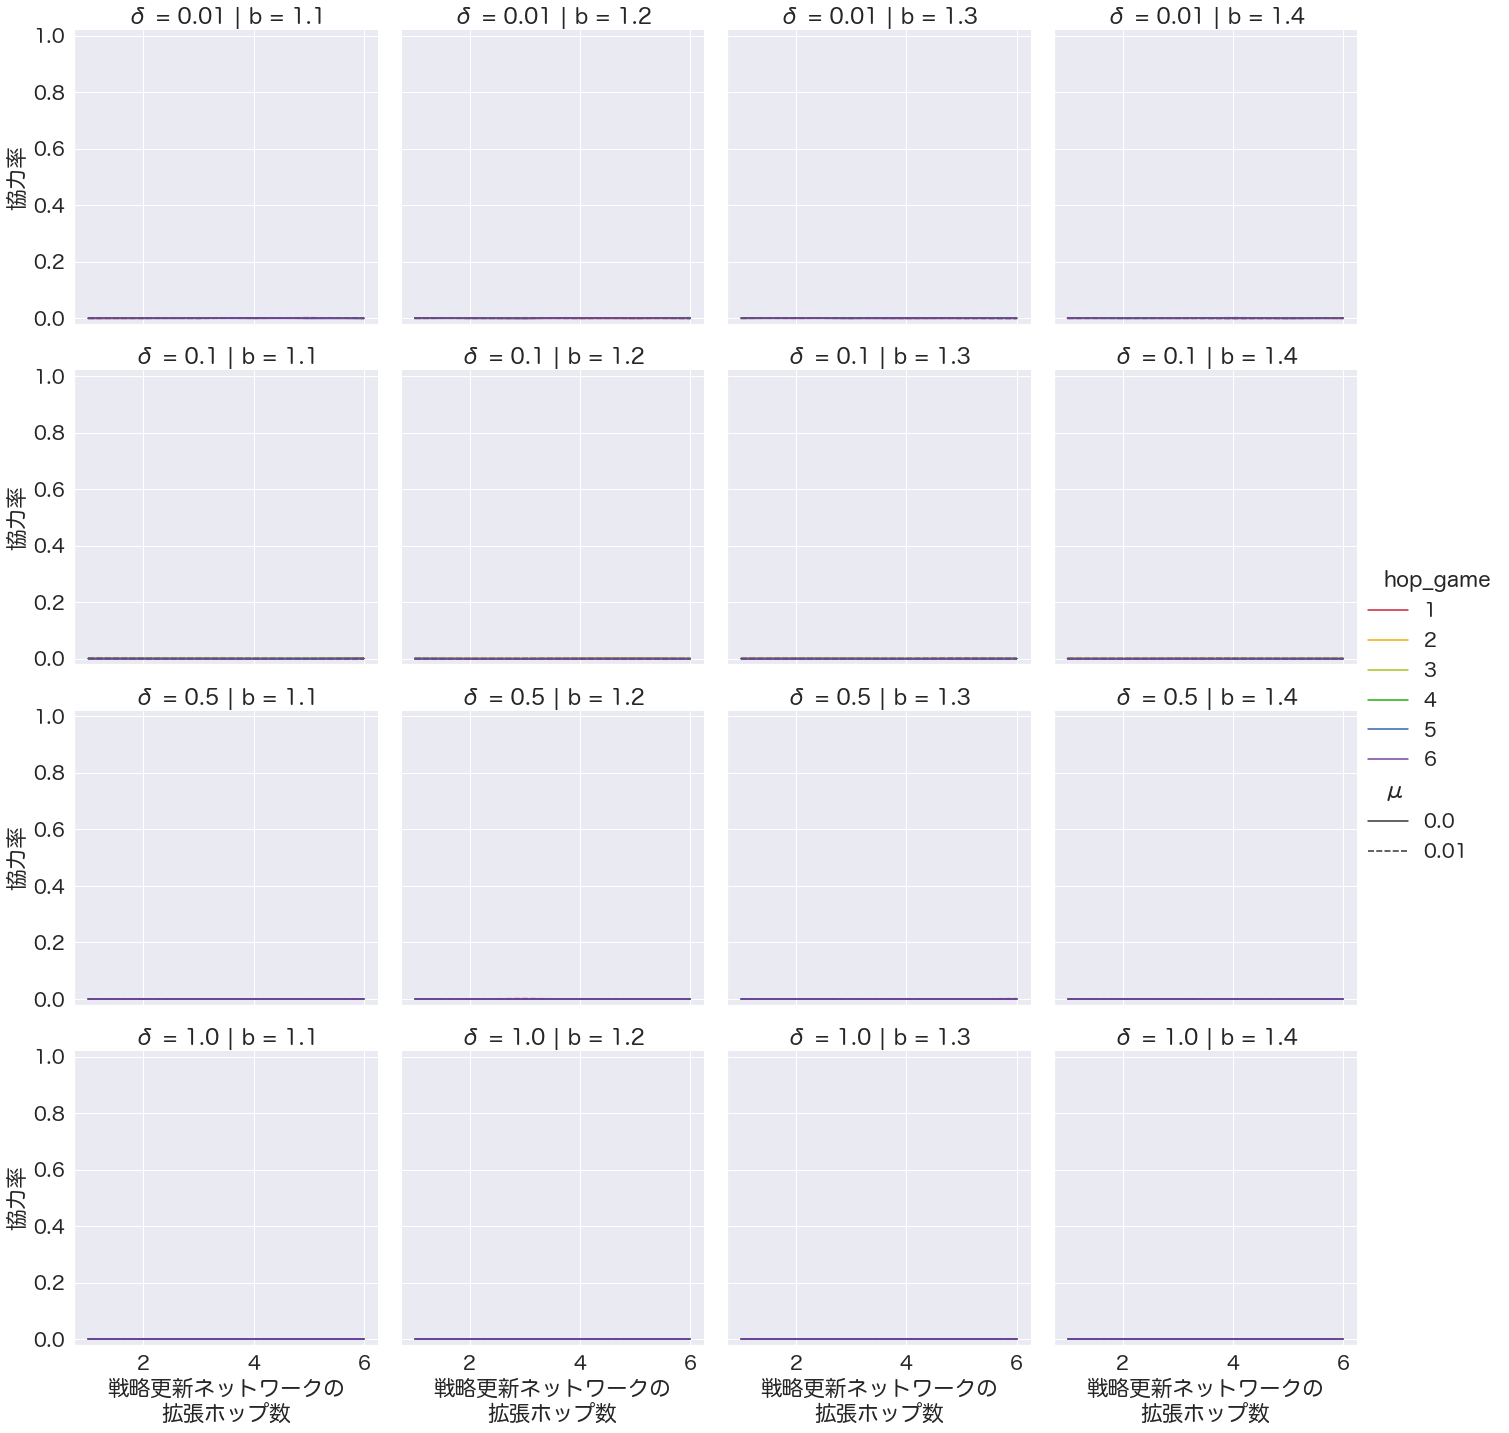


regular_4, PairWise, DB


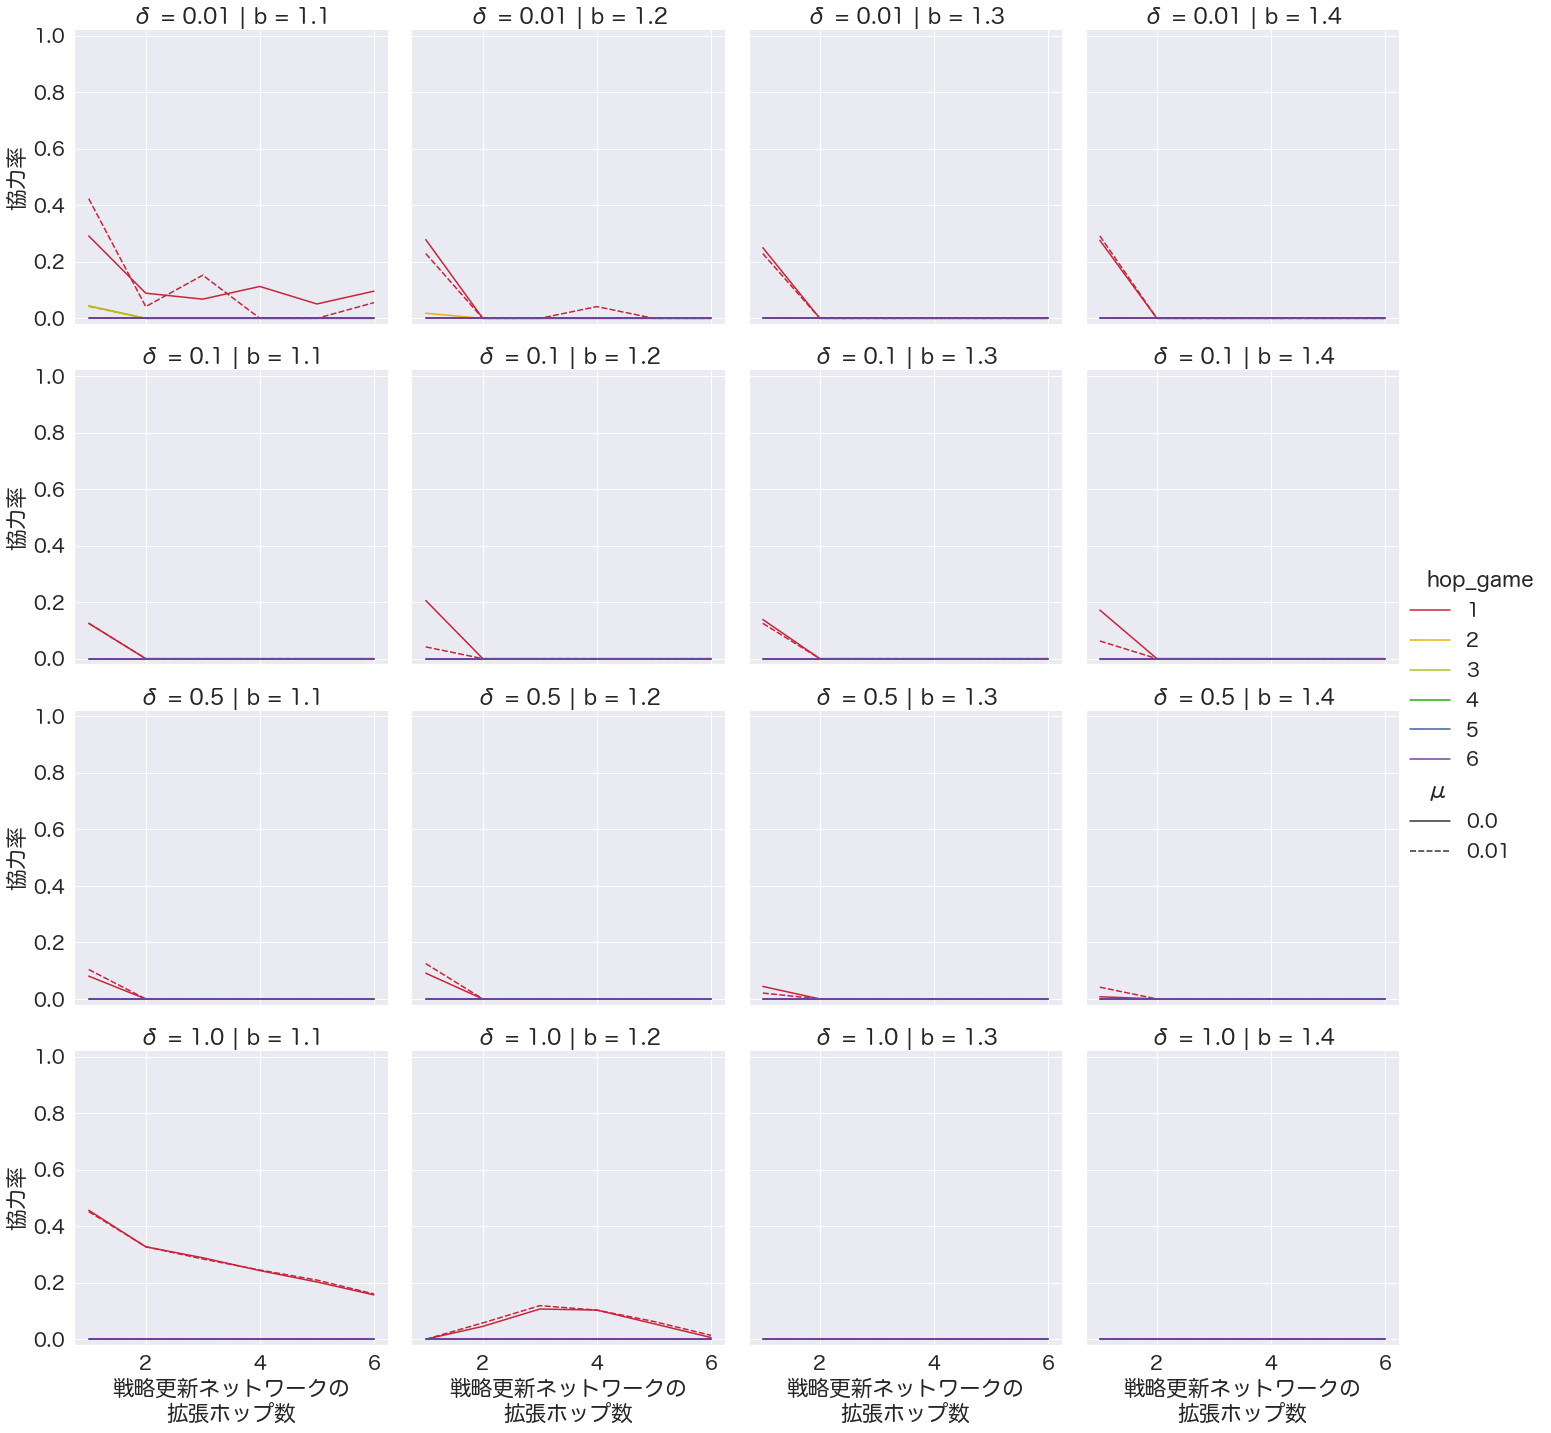


regular_4, PairWise, IM


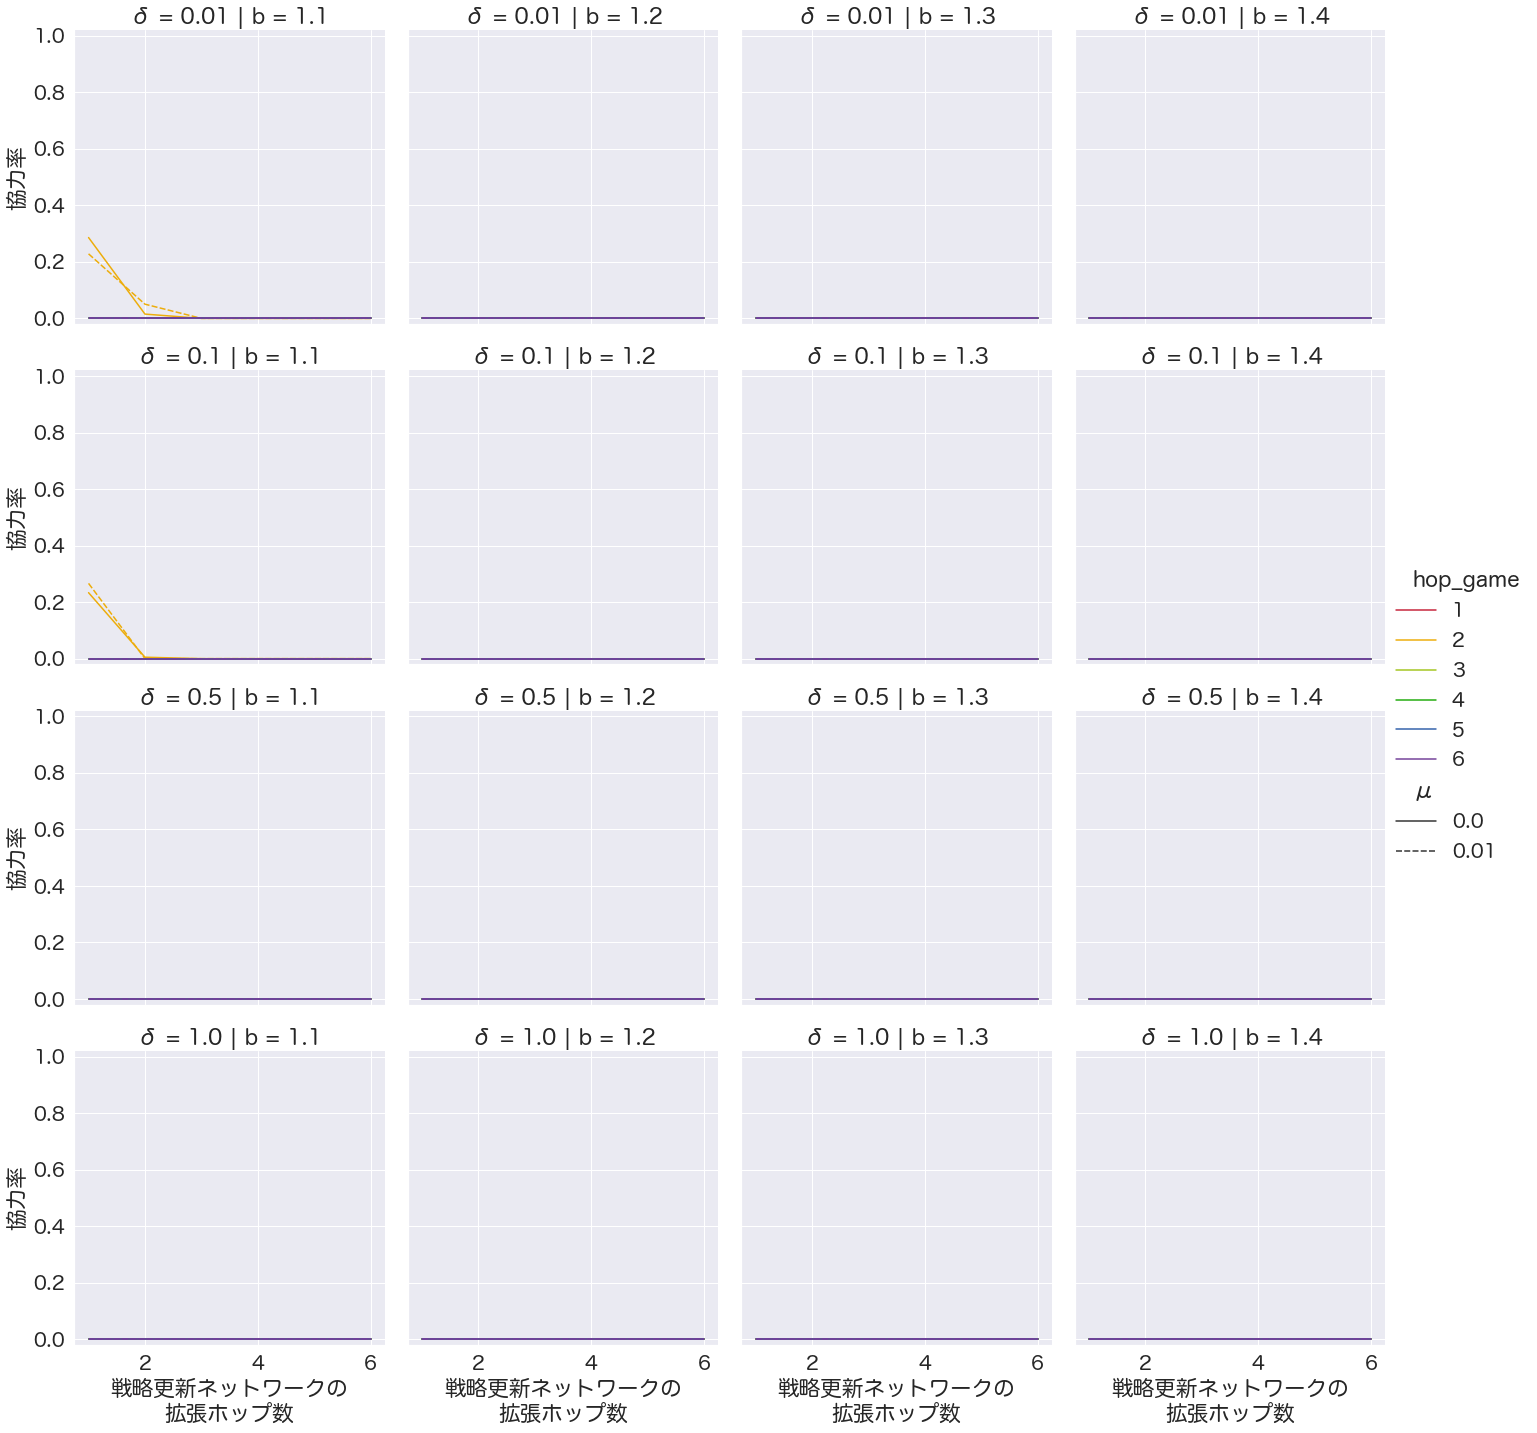


scale_free_4, PairWise, BD


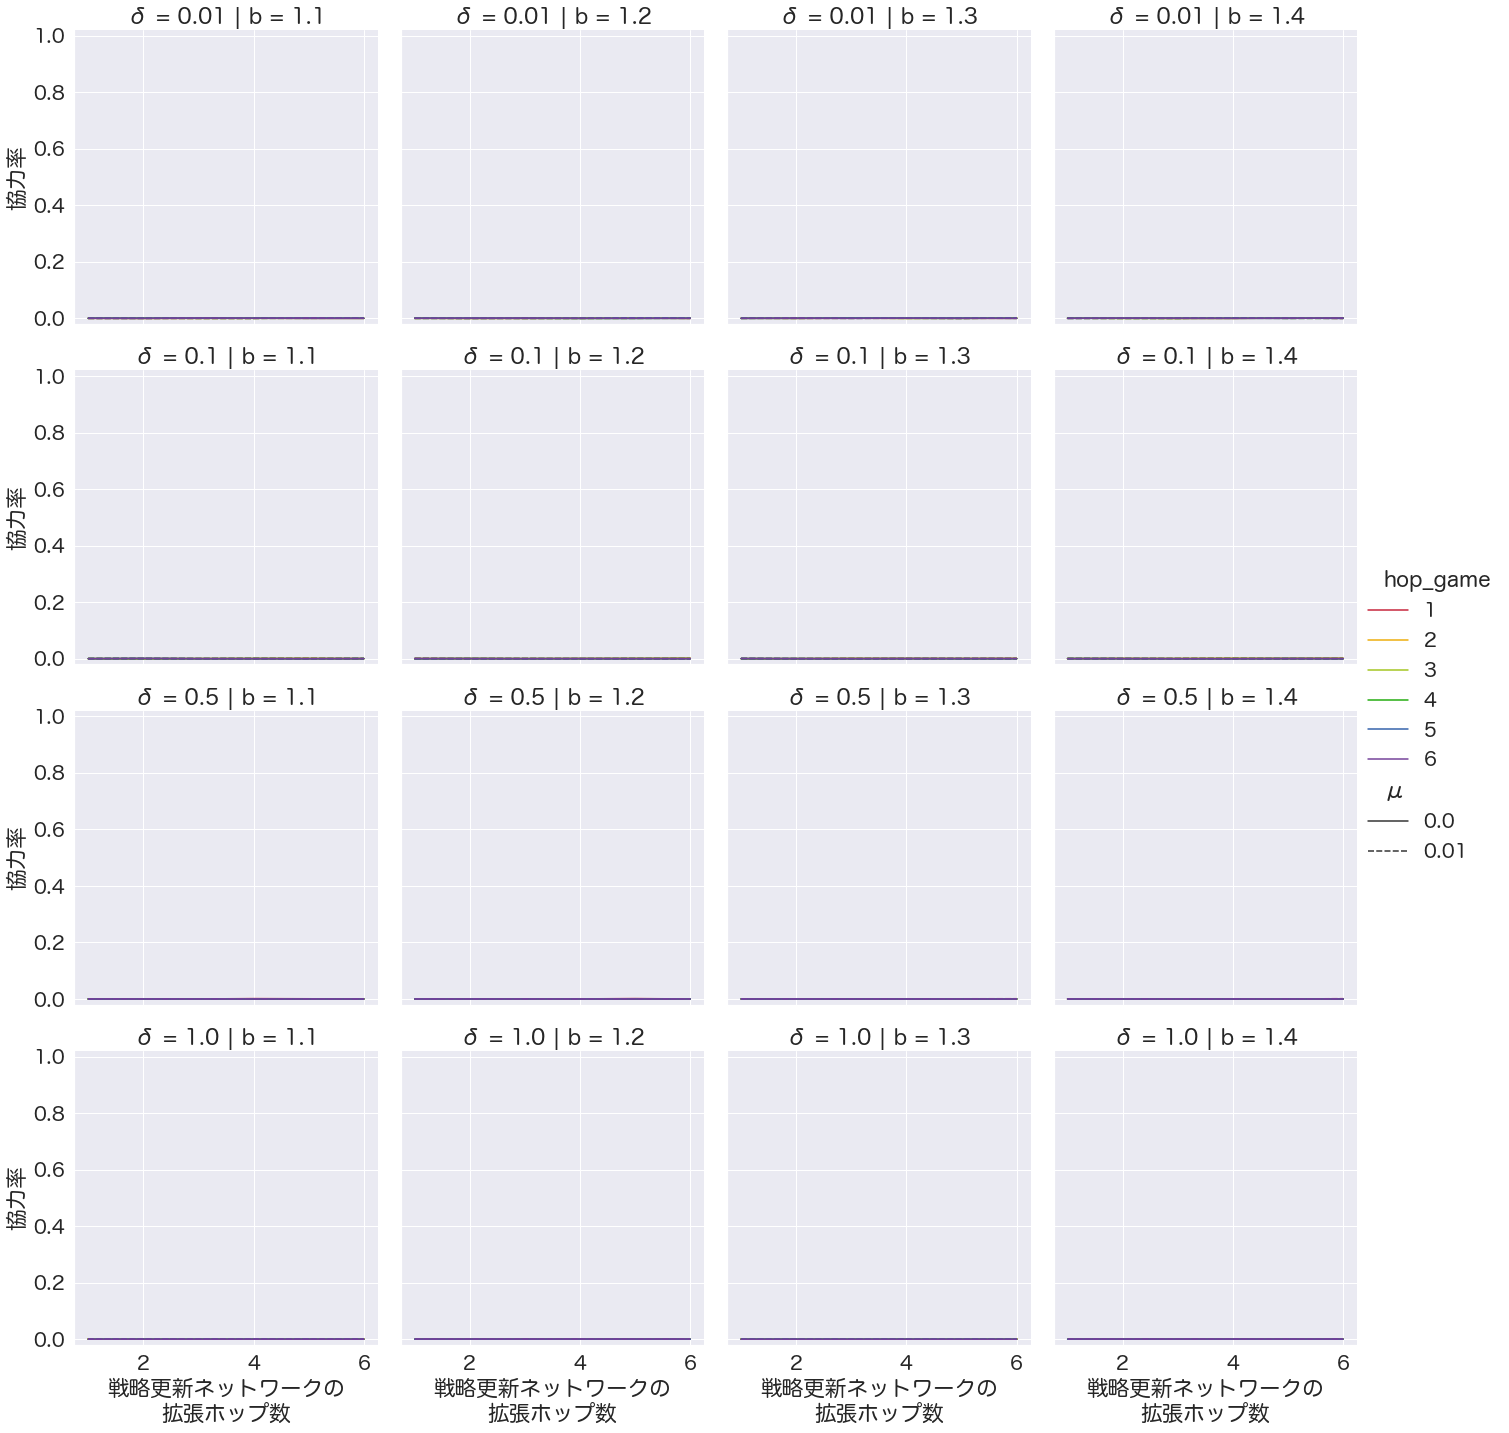


scale_free_4, PairWise, DB


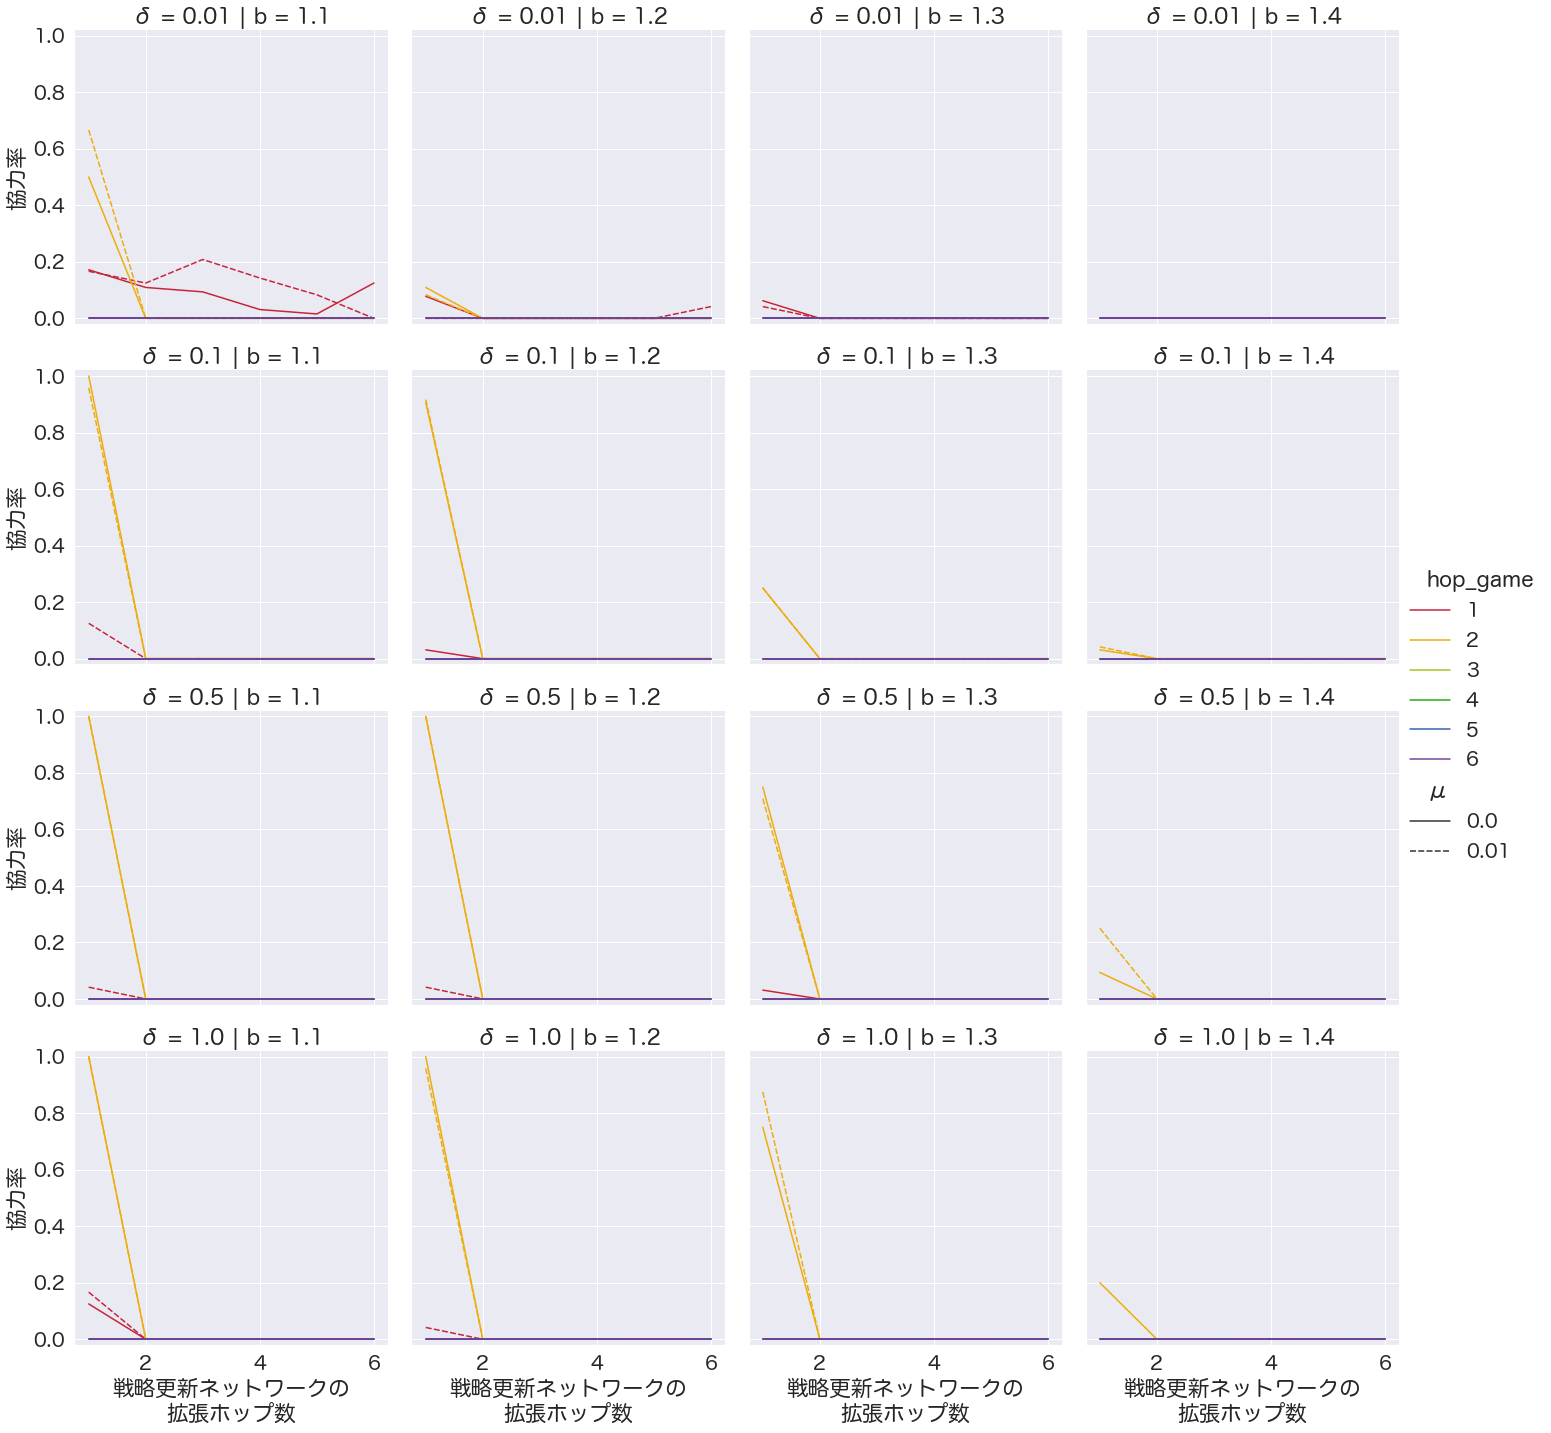


scale_free_4, PairWise, IM


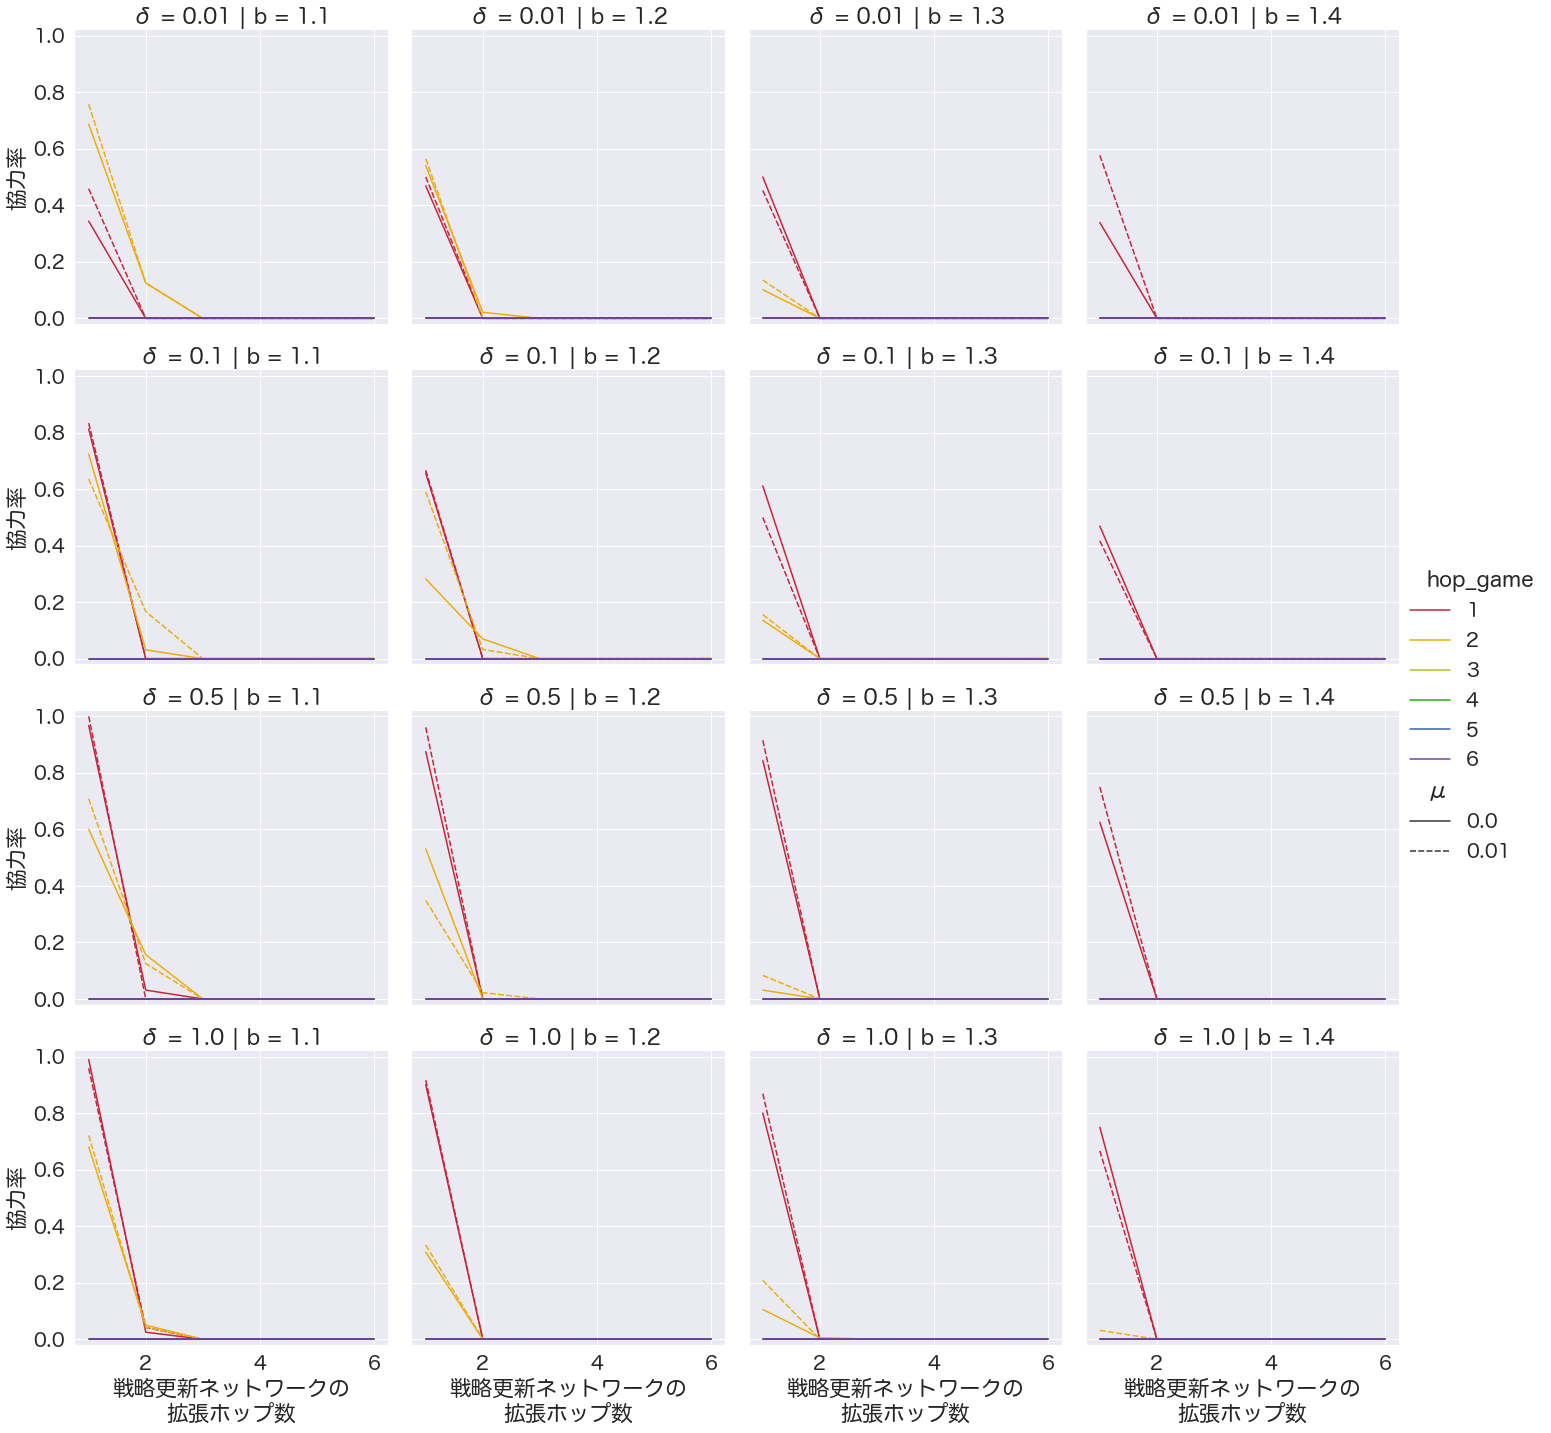

In [8]:
for (_, network_type, interaction_rule, update_rule) in df[['network_type', 'interaction_rule', 'update_rule']].drop_duplicates().itertuples():
    _df = df[(df.network_type == network_type) & (df.interaction_rule == interaction_rule) & (df.update_rule == update_rule)][[
        'hop_game', 'hop_learning', 'b', 'δ', 'μ', 'cooperator_rate'
    ]].reset_index(drop=True)
    g = sns.relplot(kind='line', x='hop_learning', y='cooperator_rate', hue='hop_game', row='δ', col='b', style='μ', palette=palette6, data=_df)
    g.set_axis_labels('戦略更新ネットワークの\n拡張ホップ数', '協力率')
    g.set(ylim=(-0.02, 1.02))
    print('\n{}, {}, {}'.format(network_type, interaction_rule, update_rule))
    plt.show()

In [22]:
df[df.update_rule == 'BD'].groupby(['network_type']).agg({'cooperator_rate': [np.mean, np.std]}).reset_index()

network_type cooperator_rate          
                           mean       std
0      random_4        0.000153  0.000302
1     regular_4        0.000186  0.000388
2  scale_free_4        0.000171  0.000320